# **Adult Income Prediction notebook**

# **Description:**

> **In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.**

> **The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 48842 rows and 15 features that can be downloaded here(https://www.kaggle.com/uciml/adult-census-income)**

>**The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.**


# **Step 1: Load libraries and dataset**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/Adult_data/adult.csv")

In [8]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# **Step 2: Descriptive analysis**

In [9]:
data.shape

(48842, 15)

In [10]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
# Shape of dataset
print('Total dataframe  Rows: {} '.format(data.shape[0]))
print('Total dataframe Columns: {}'.format(data.shape[1]))

Total dataframe  Rows: 48842 
Total dataframe Columns: 15


In [13]:
data1=data.copy()

In [14]:
data1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# **Summary statistics for numeric attribute**

In [15]:
data1.describe()



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# **Observations:**

### **For Age :**

> **<br>1.The mean value is 38 i.e. on an average the value of age attribute is 38.
<br>2.Age is having the standerd deviation 13.71 which indicates the deviation of an observation from the mean.
<br>3.The value of Age attribute varies from 17 to 90.
<br>4.The 1st quartile is 28 i.e. 25% of the observations lies below 28.
<br>5.3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
<br>6.The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
<br>7.The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.**

 ### **For fnlwgt :**

>**<br>1.This is the sampling weight corresponding to the observations.
<br>2.finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.**


### **For capital-gain :**

> **<br>1.or capital-gain, the mean is 1079.01 and median is 0, which indicates that the distribution is highly right skewed.
<br>2.From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
<br>3.capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
<br>4.capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).**

### **For capital-loss :**

> **<br>1.This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
<br>2.Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).**



### **For hours-per-week :**

> **<br>1.This attribute means number of working hours spend by an individual in a week.
<br>2.In this data the hours per week atrribute varies within the range of 1 to 99.
<br>3.75 percentage of the people spend 45 or less working hours per week.
<br>4.The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
<br>5.Observations are very sparse below 25th percentile and after 75th percentile.
<br>6.Using quartiles we can say that data is approximately symmetric.
<br>7Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.**









# **Summary categorical attribute**


In [16]:
data1.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


# **Observations:**

>**<br>1.Native-country has maximum number of unique categories i.e. 41 categories.**

>**<br>2.But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).**

>**<br>3.Occupation has more or less uniform distribution of categories as comparerd to the other attributes.**

>**<br>4.Race is also biased to the white race category(41762) with 85.5%.**

>**<br>The top category in workclass is Private having frequency(36705) and percentage(75.5%).**

In [17]:
print(f"Target: 'Income'\nUnique Values in Income: {data1.income.unique()}\nNumber of unique values: {data1.income.nunique()}")

Target: 'Income'
Unique Values in Income: ['<=50K' '>50K']
Number of unique values: 2


**In the problem, we have 'Income' as the Target variable. we see that we have only two values which are to be predicted, either the income is greater than 50K, which is Yes, or the income is less than or equal to 50K, which is No. We will label encode the target variable.**

In [18]:
# Check for '?' in dataset
round((data1.isin(['?']).sum() / data1.shape[0])
      * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [19]:
# Checking the counts of label categories
income = data1['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    76.07 %
>50K     23.93 %
Name: income, dtype: object

# **Observations:**

*  **The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.**

*   **The dataset is unbalanced, as the dependent feature 'income' contains 76.7% values have income less than 50k and 23.93% values have income more than 50k.** 


# **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


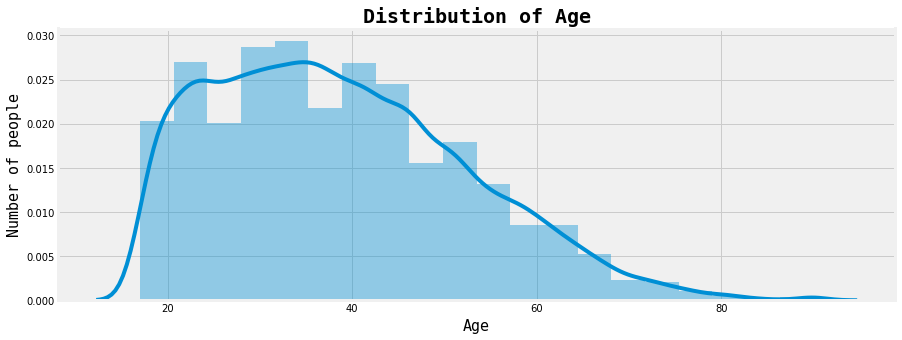

In [20]:
# Creating a distribution plot for 'Age'
age = data1['age'].value_counts()

plt.figure(figsize=(15, 5))
plt.style.use('fivethirtyeight')
sns.distplot(data1['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


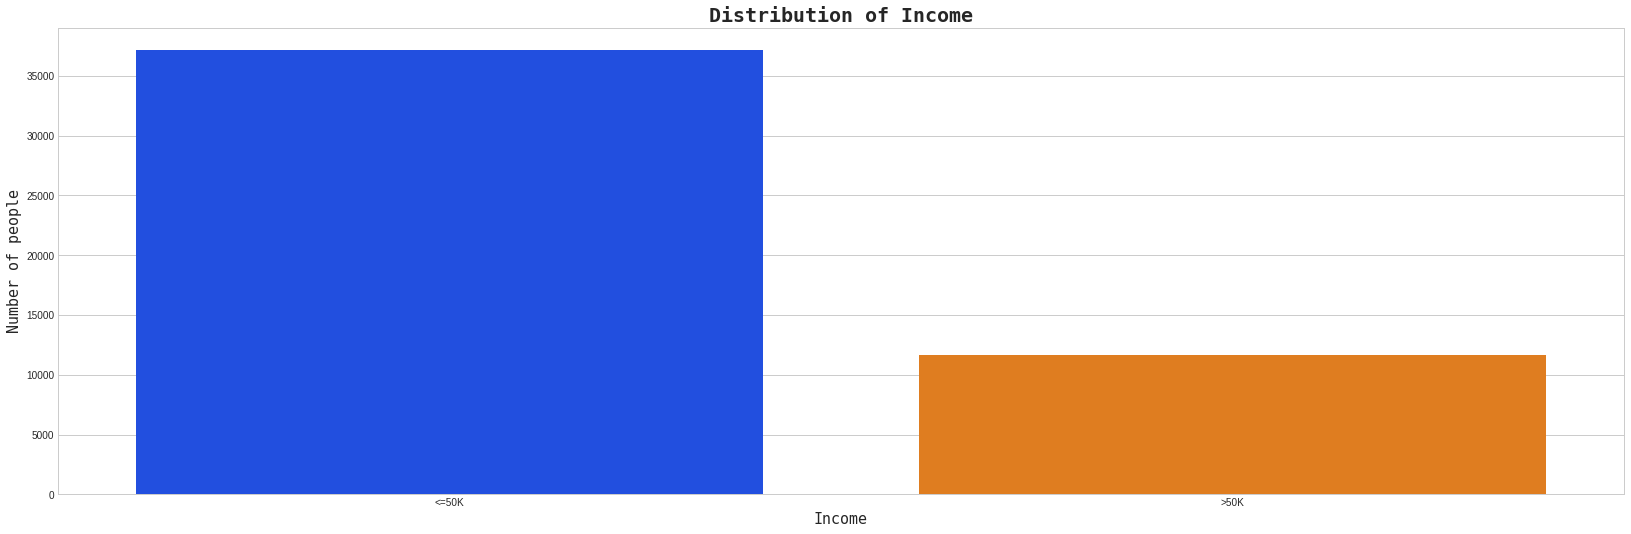

In [21]:
# Creating a barplot for 'Income'
income = data1['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25, 8))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

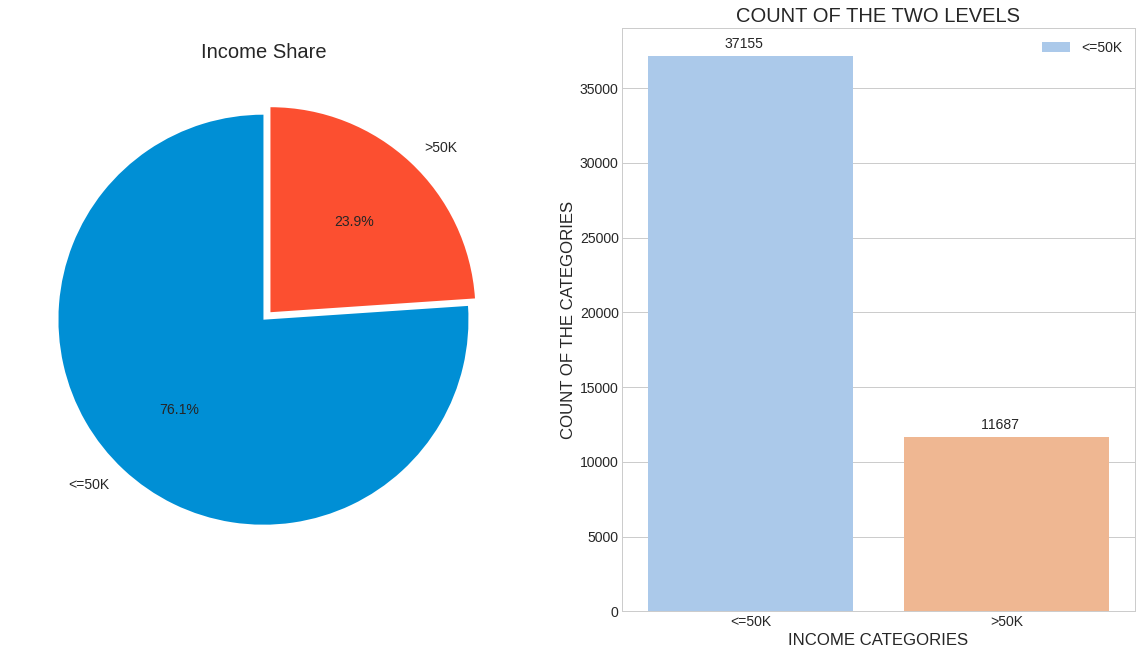

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,10))
#plt.figure(figsize=(7,10))
income1=data1['income'].value_counts()
ax[0].pie(income1,explode=(0,0.05),autopct='%1.1f%%',startangle=90,labels=['<=50K','>50K'])
ax[0].set_title('Income Share')
ax[1]=sns.countplot(x='income',data=data1,palette='pastel')
ax[1].legend(labels=['<=50K','>50K'])
ax[1].set(xlabel="INCOME CATEGORIES")
ax[1].set(ylabel='COUNT OF THE CATEGORIES')
ax[1].set_title('COUNT OF THE TWO LEVELS')

for p in ax[1].patches:
    ax[1].annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+500))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


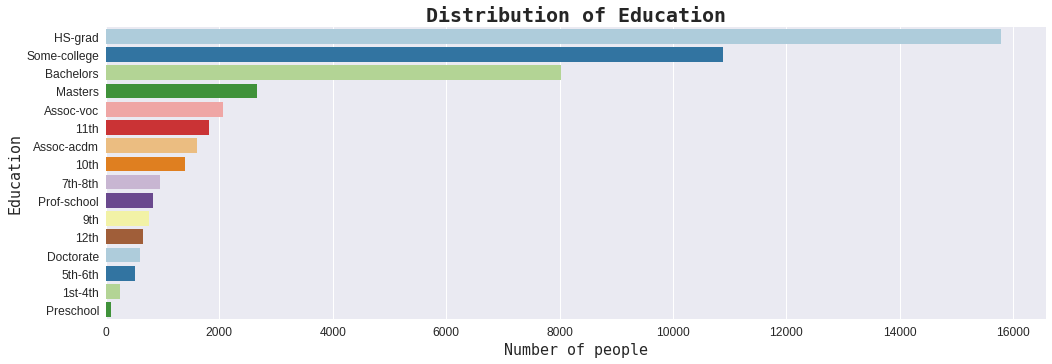

In [23]:
# Creating a barplot for 'Education'
edu = data1['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# **Creating a barplot for 'Years of Education'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


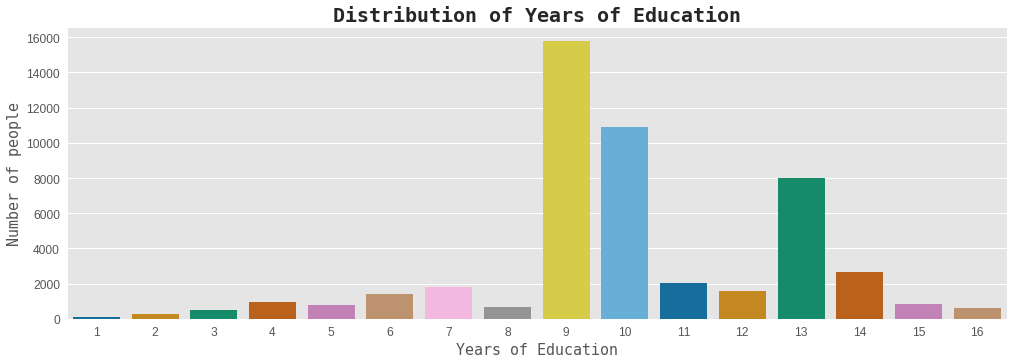

In [24]:
edu_num = data1['educational-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# **Creating a pie chart for 'Marital status'**

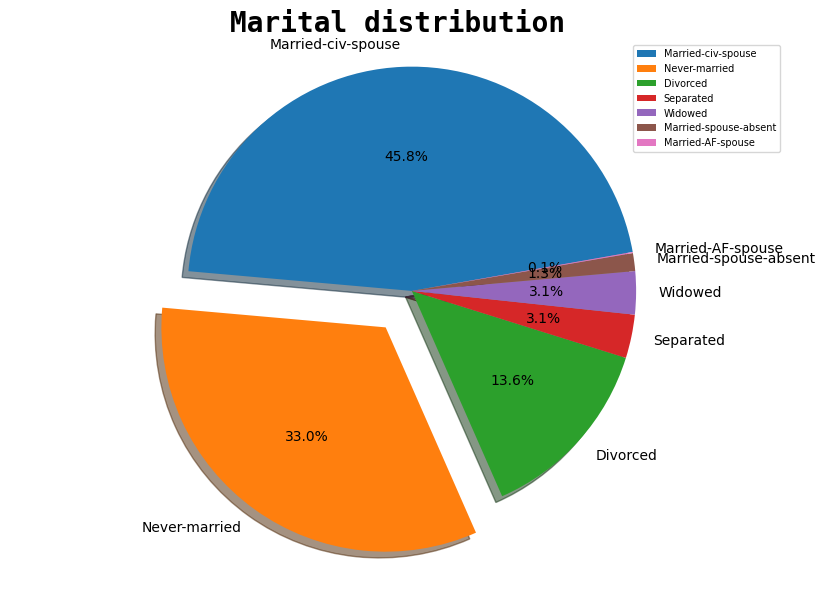

In [25]:
marital = data1['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

# **Creating a donut chart for 'Age'**

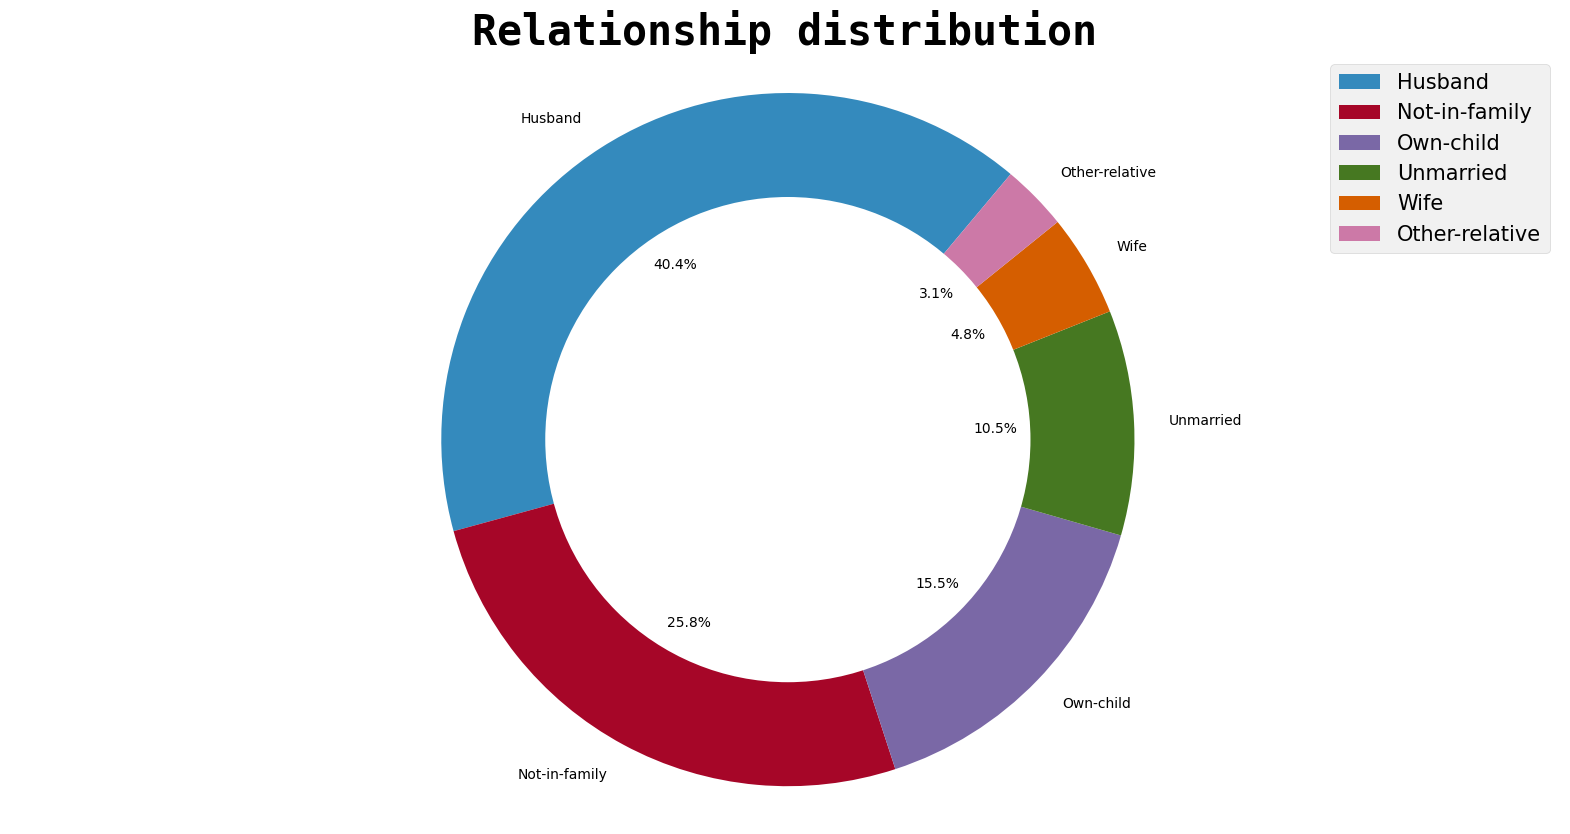

In [26]:
relation = data1['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

In [27]:
pip install squarify

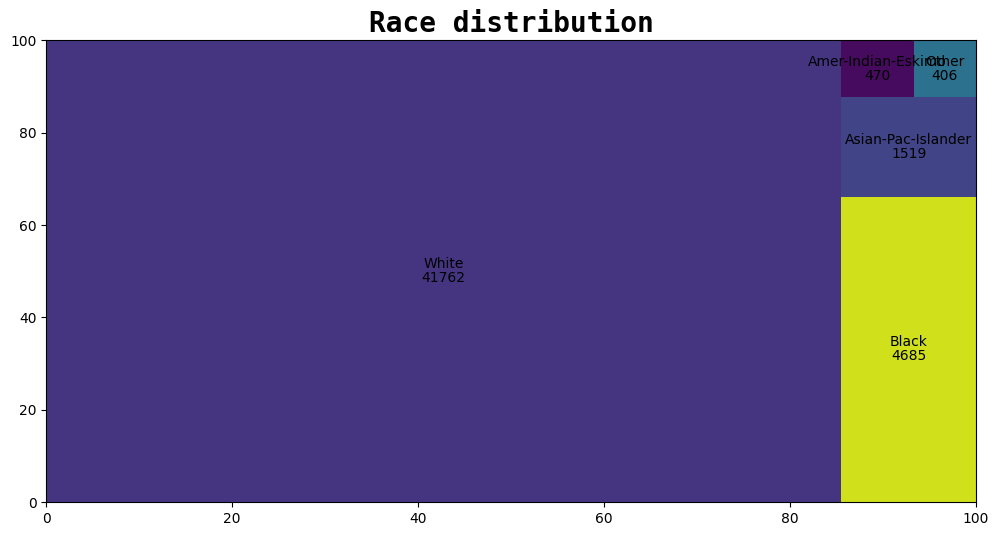

In [28]:
# Creating a Treemap for 'Race'
import squarify
race = data1['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(12, 6))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


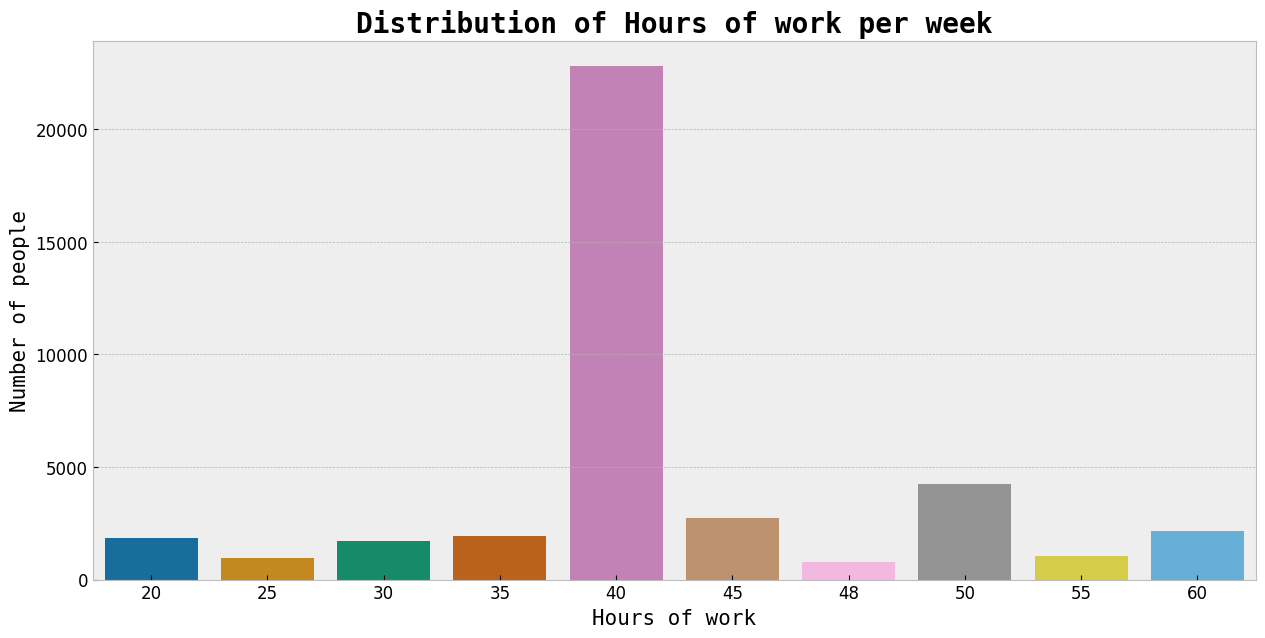

In [29]:
# Creating a barplot for 'Hours per week'
hours = data1['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

# **Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


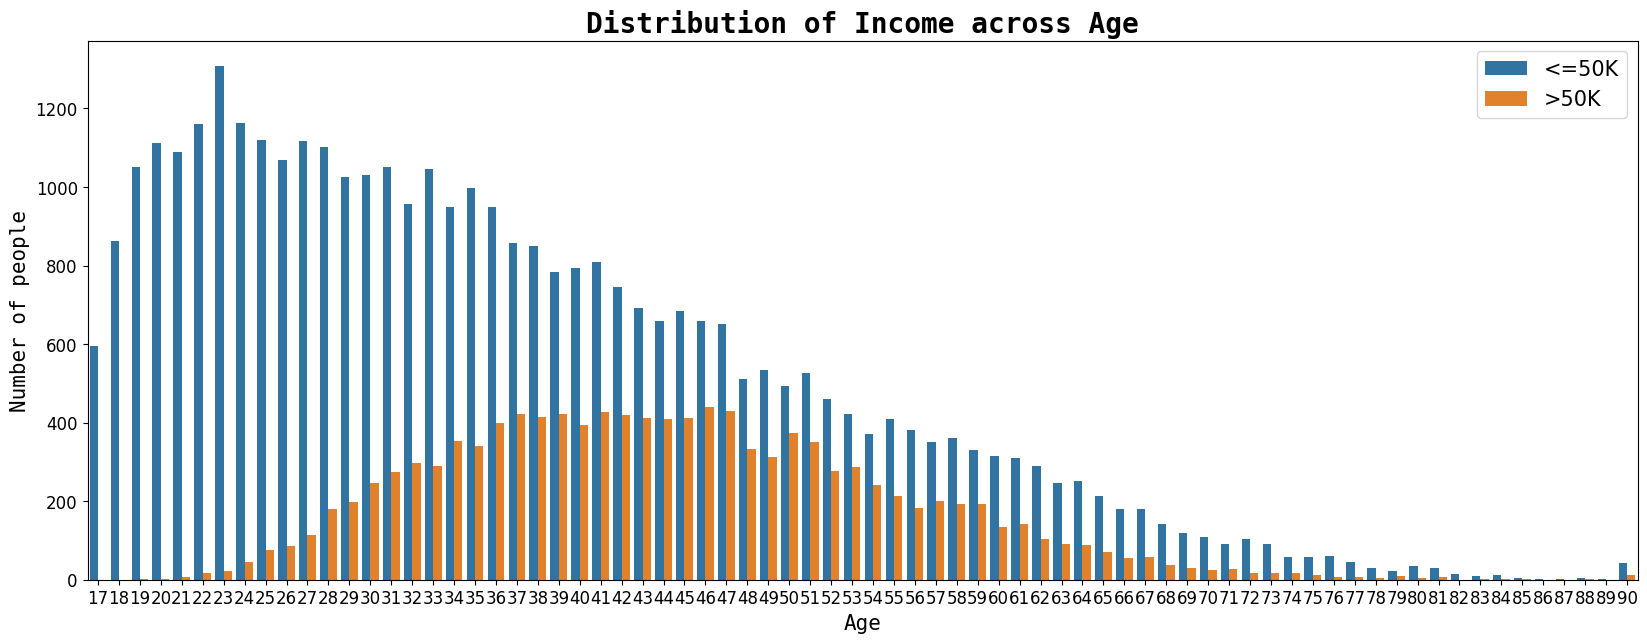

In [30]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data1['age'], hue=data1['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


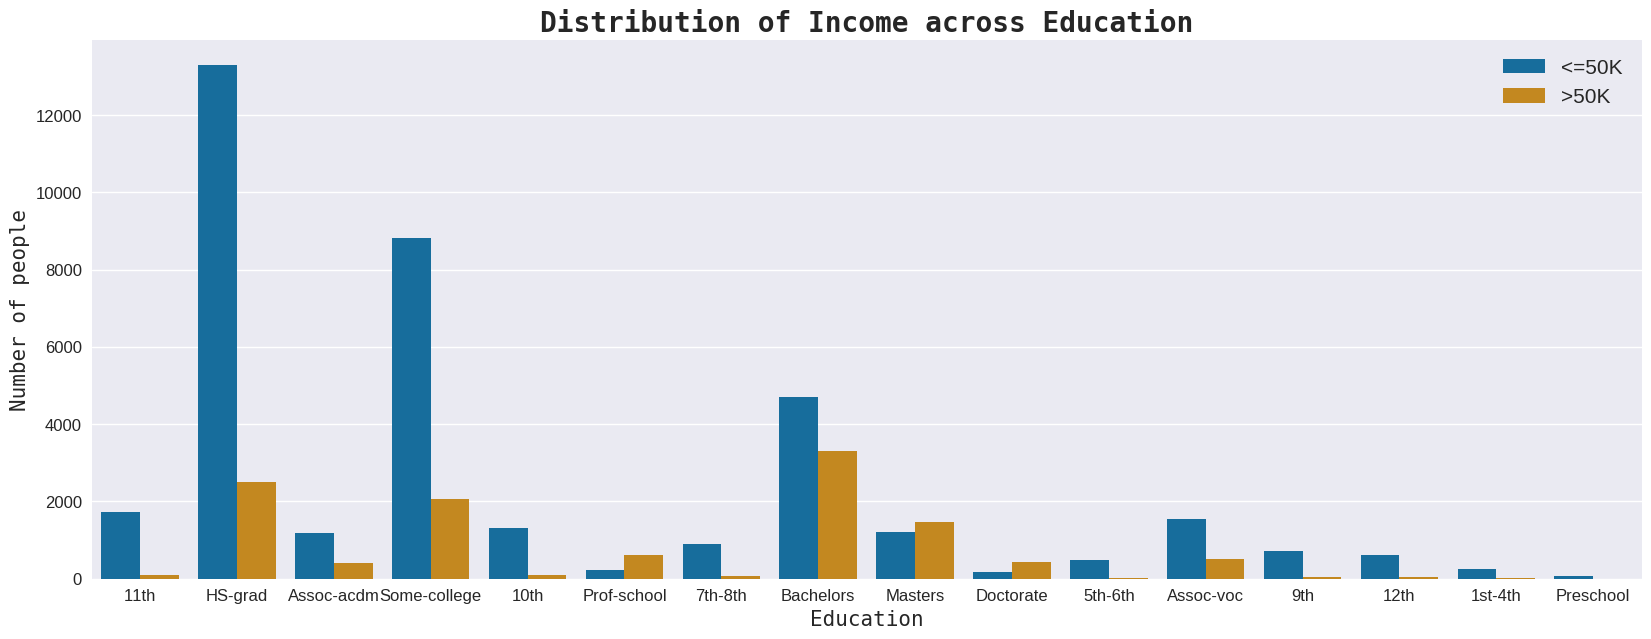

In [31]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data1['education'],
              hue=data1['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


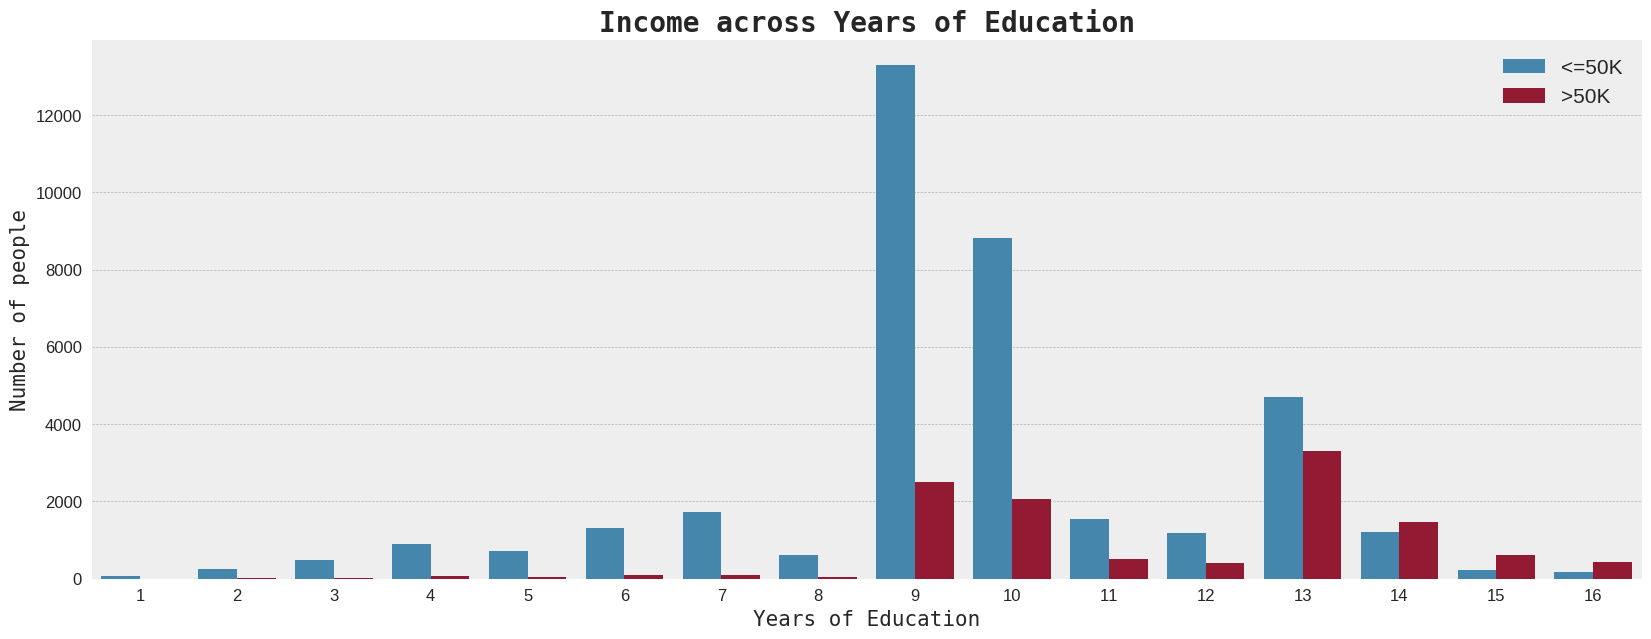

In [32]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(data1['educational-num'],
              hue=data1['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


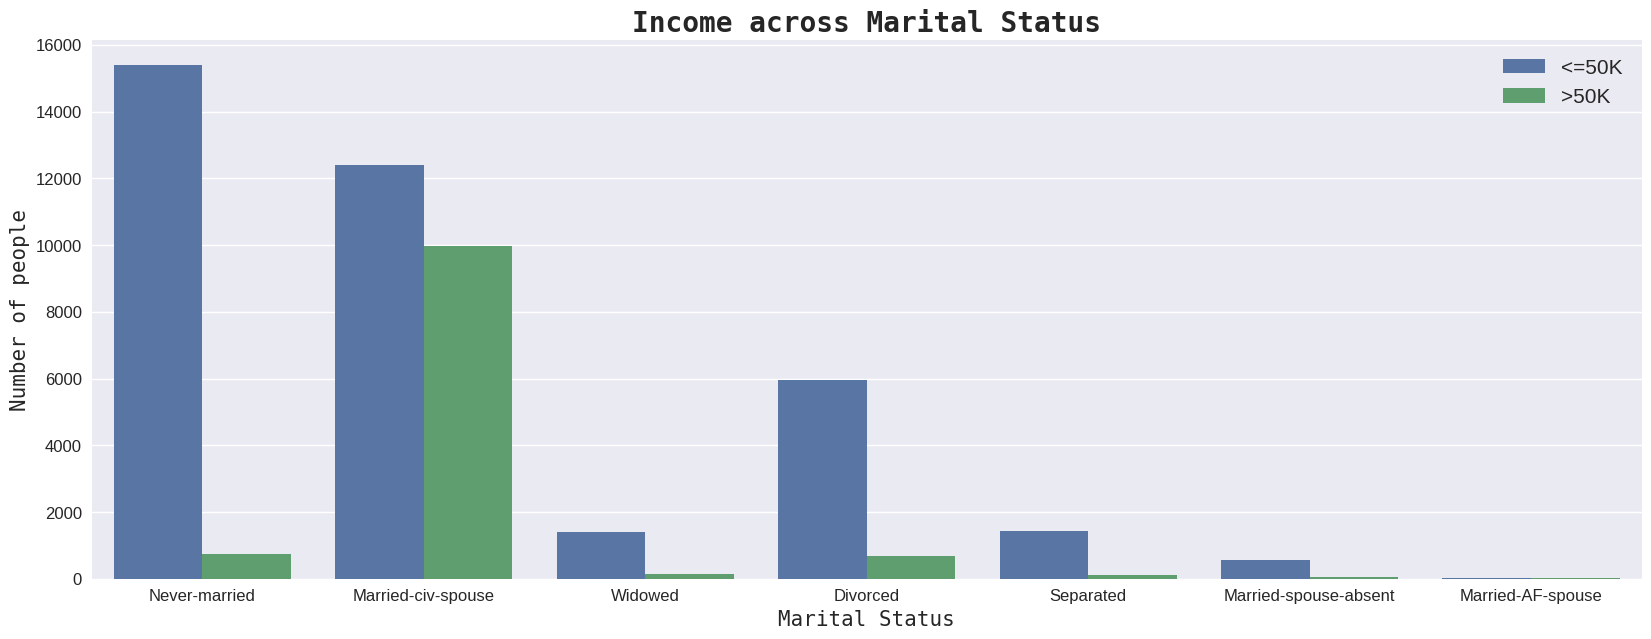

In [33]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data1['marital-status'], hue=data1['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('marital_status.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


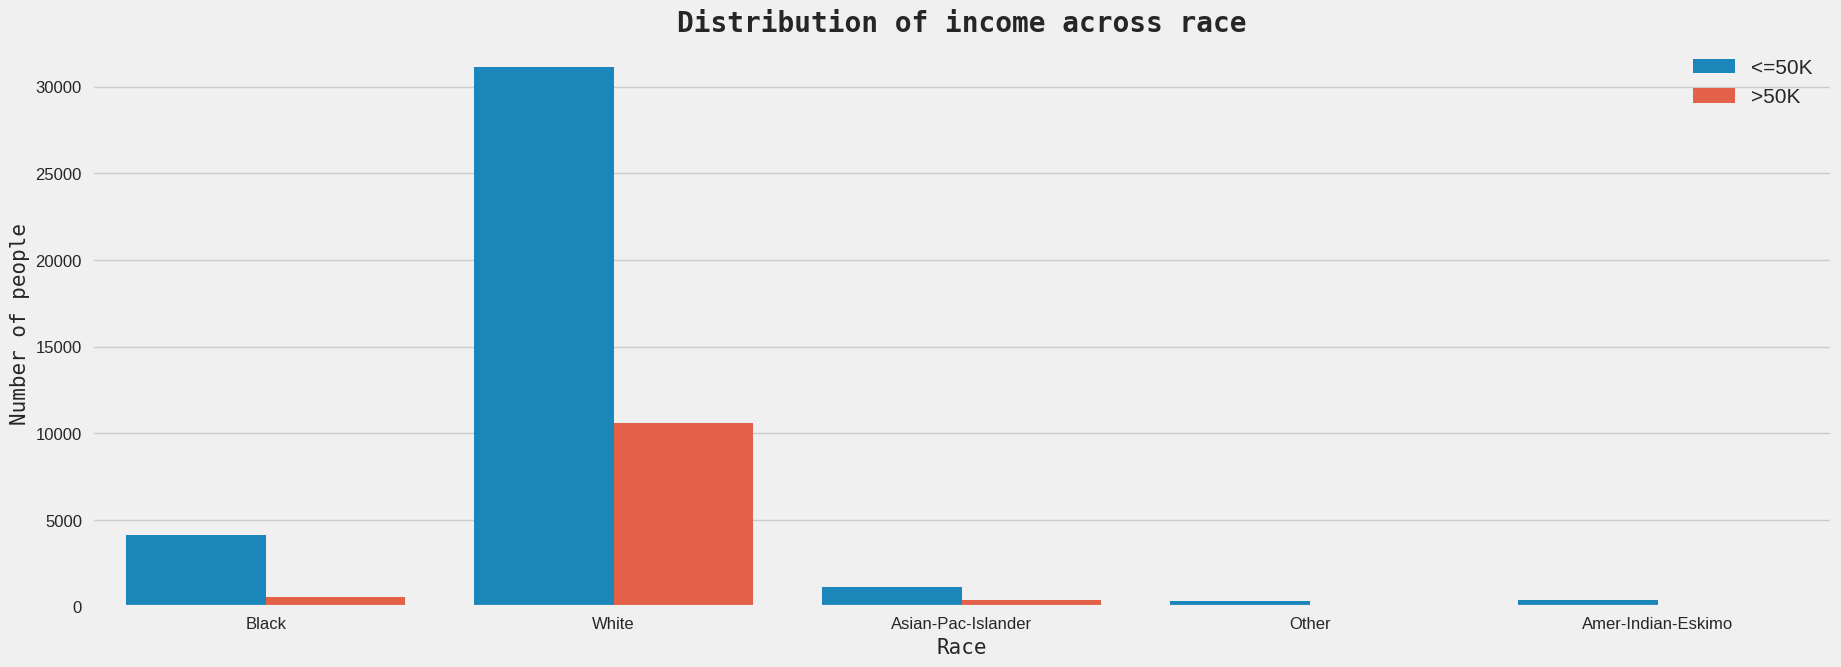

In [34]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(data1['race'], hue=data1['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


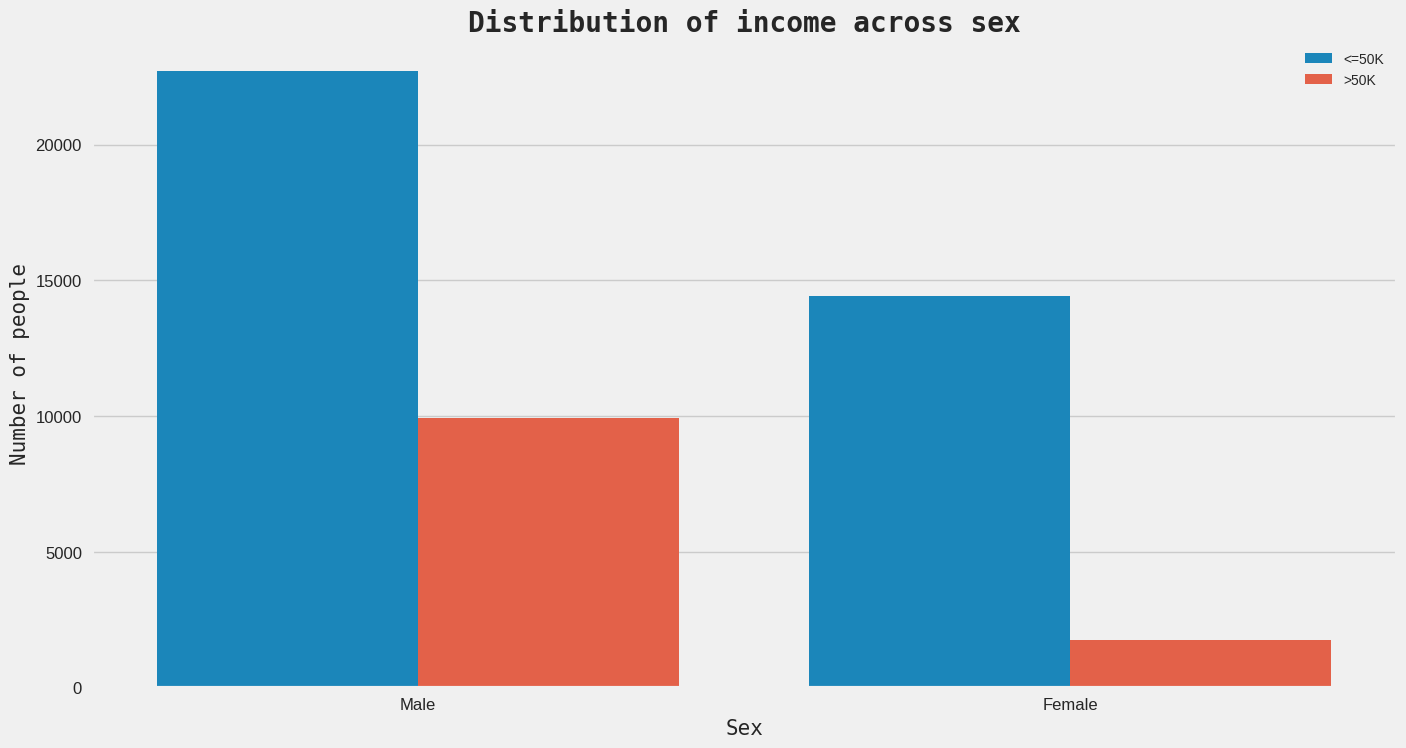

In [35]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))
sns.countplot(data1['gender'], hue=data1['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

# **Multivariate Analysis**

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['income'] = le.fit_transform(data1['income'])

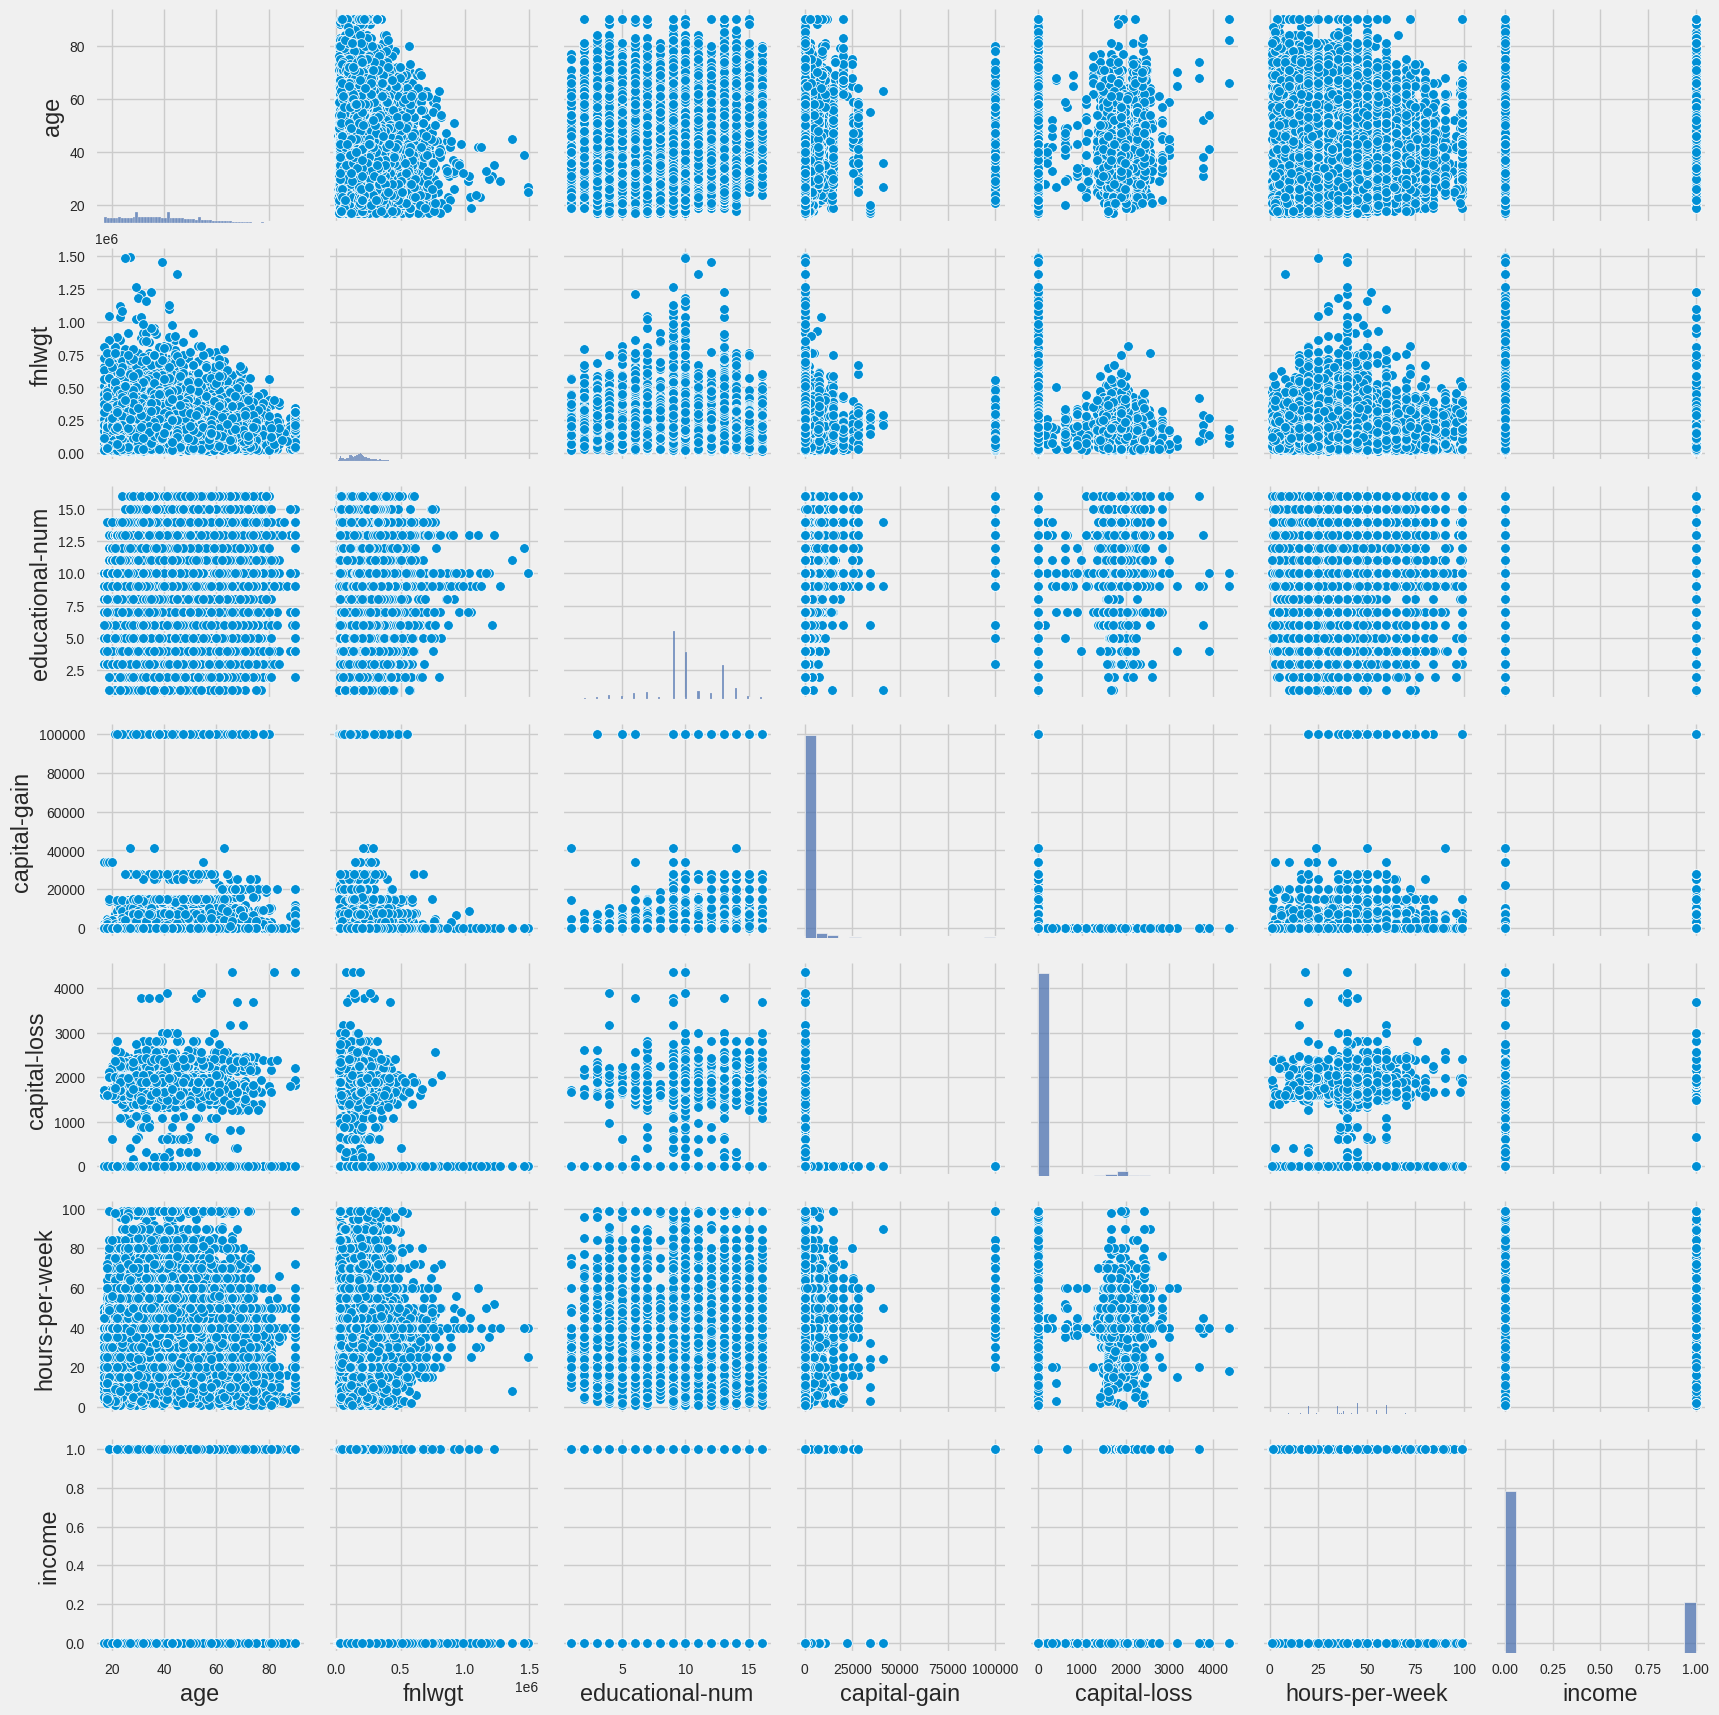

In [37]:
# Creating a pairplot of dataset
sns.pairplot(data1)
plt.savefig('sns1.png')
plt.show()

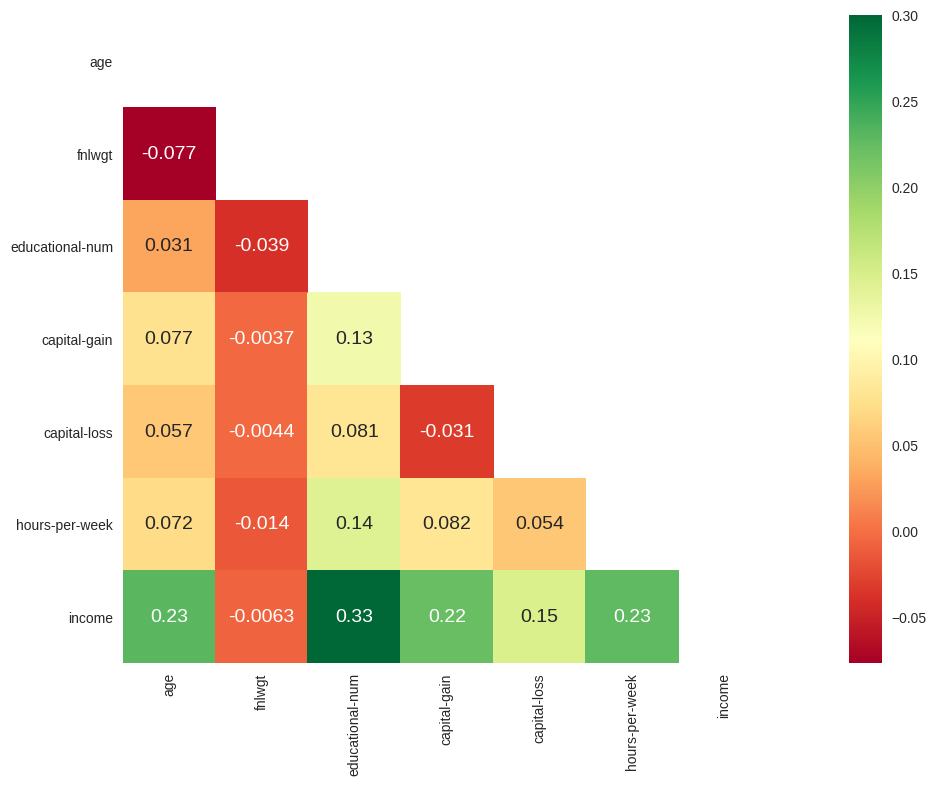

In [38]:
corr = data1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('corr1.png')
plt.show()

# **Observations:**
> **In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.**

> **From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0ab18dc50>,
      dtype=object)

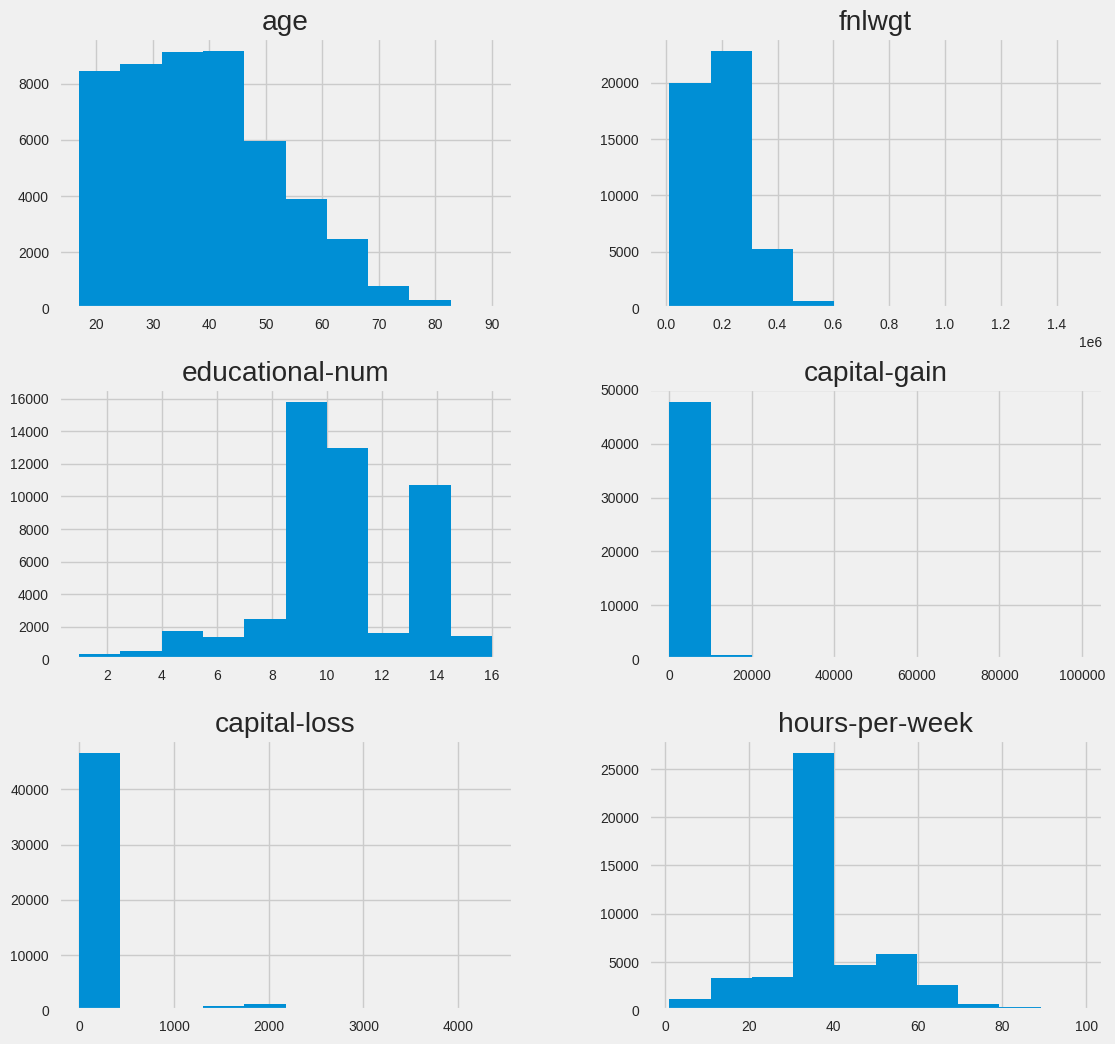

In [39]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 12
data[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

In [40]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [41]:
data['income'].value_counts()  

<=50K    37155
>50K     11687
Name: income, dtype: int64

# Encode the target variable to binary

In [42]:
data['income'] = data['income'].apply(lambda inc: 0 if inc == "<=50K" else 1) # Binary encoding of the target variable

# **Exploratory analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


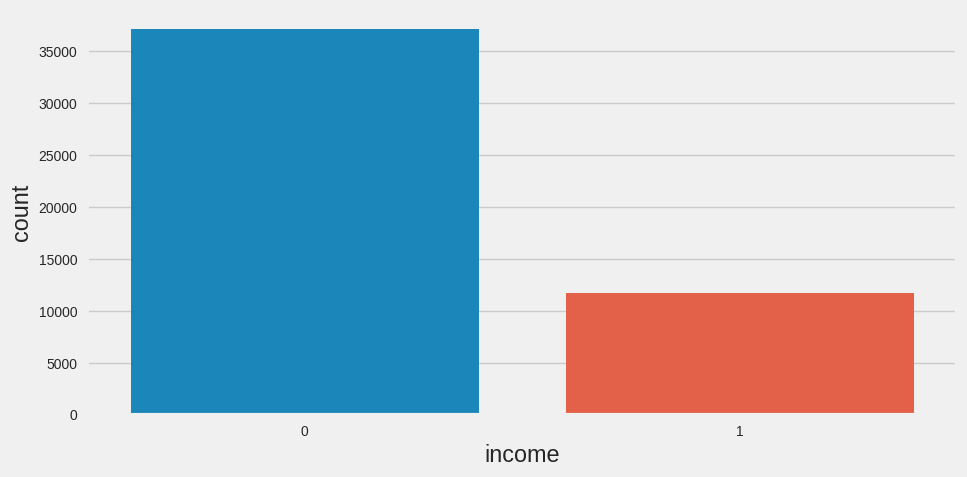

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data['income'])

**As one can see, there is considerable class imbalance in the target variable, i.e. income. This is also intuitively obvious as one expects fewer 'rich' people (earning>50k/annum) than 'not-so-rich' people (earning <50k/annum). Therefore we might need to consider over-sampling techniques in our ML model to improve our accuracy.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


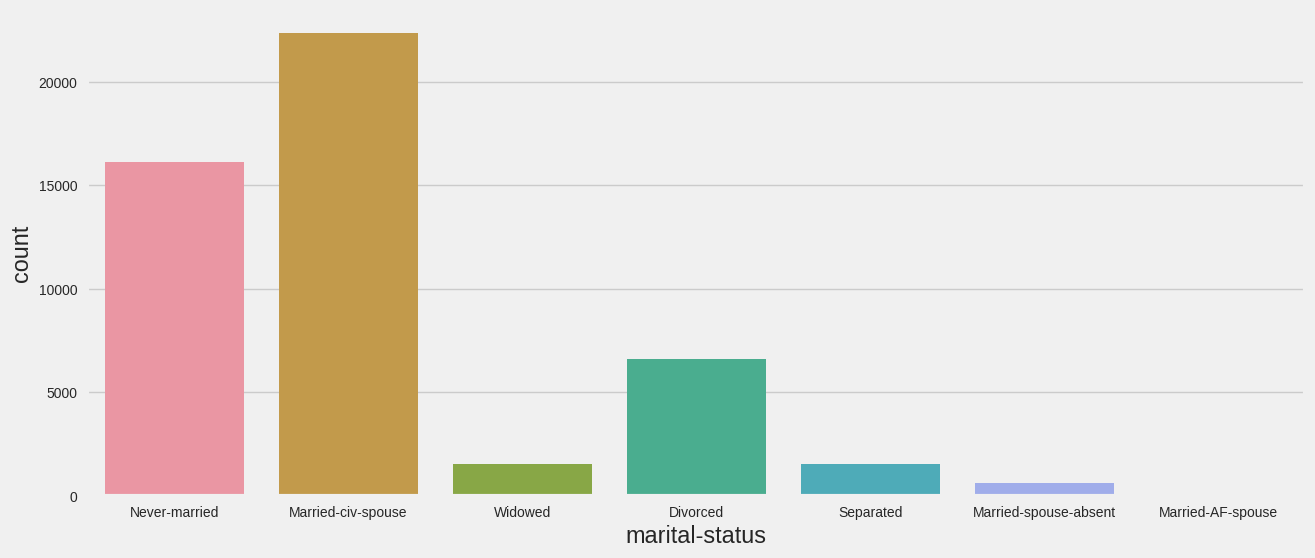

In [44]:
plt.figure(figsize=(14,6))
sns.countplot(data['marital-status'])

**Those with Never-married and Married-civ-spouse labels dominate the dataset**

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

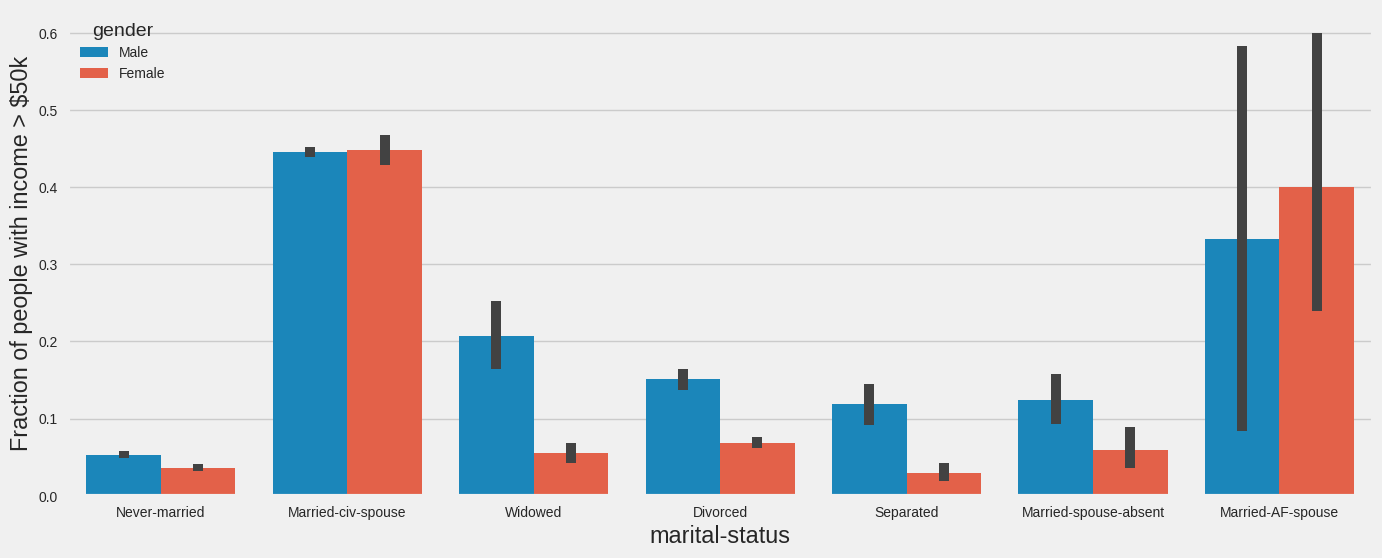

In [45]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='marital-status',y='income',data=data,hue='gender')
ax.set(ylabel='Fraction of people with income > $50k')
data['marital-status'].value_counts()

**The above plot shows the the fraction of people earning more than $50k per annum, grouped by their marital status and gender. The data shows that married people have a higher %age of high-earners, compared to those who either never married or are widowed/divorced/separated. The black lines indicate 2 standard deviations (or 95\% confidence interval) in the data set. The married spouses of armed forces personnel have a much higher variation in their income compared to civil spouses because of low-number statistics.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


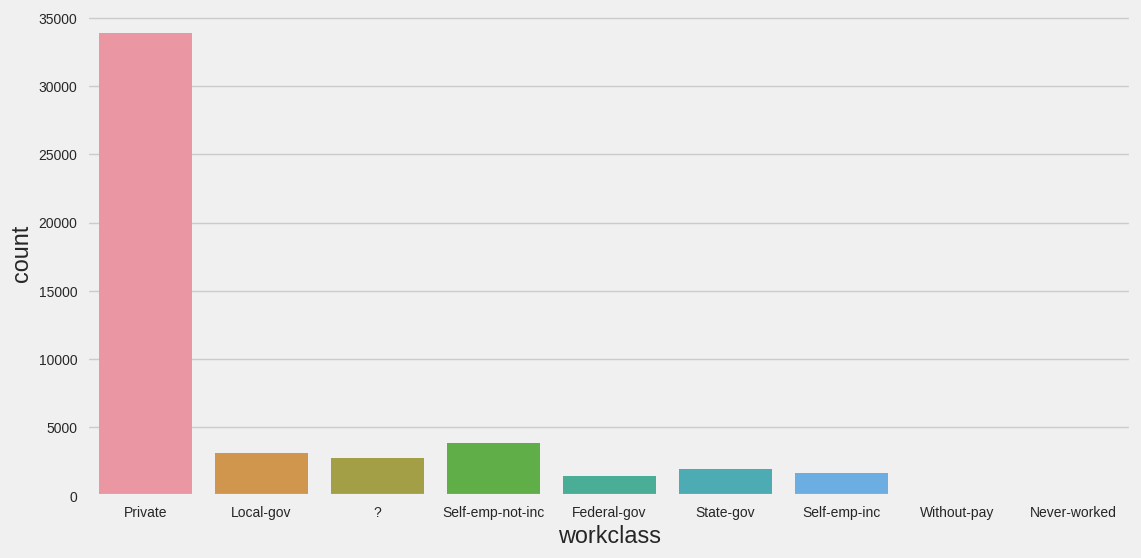

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(data['workclass'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Fraction of people with income > $50k')]

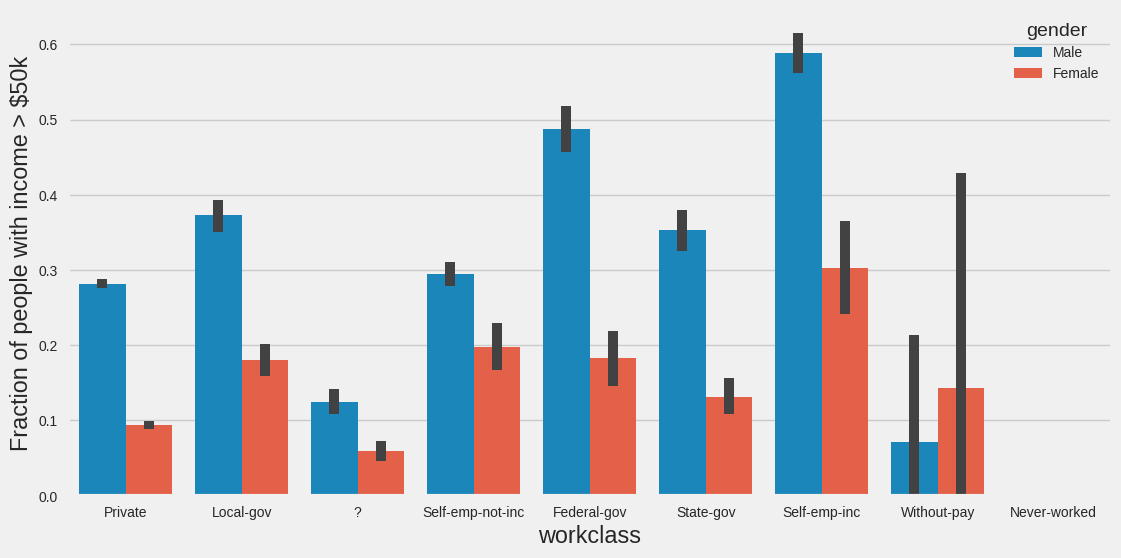

In [47]:
plt.figure(figsize=(12,6))
ax=sns.barplot('workclass', y='income', data=data, hue='gender')
ax.set(ylabel='Fraction of people with income > $50k')

Text(0.5, 1.0, 'Heatmap showing correlations between numerical data')

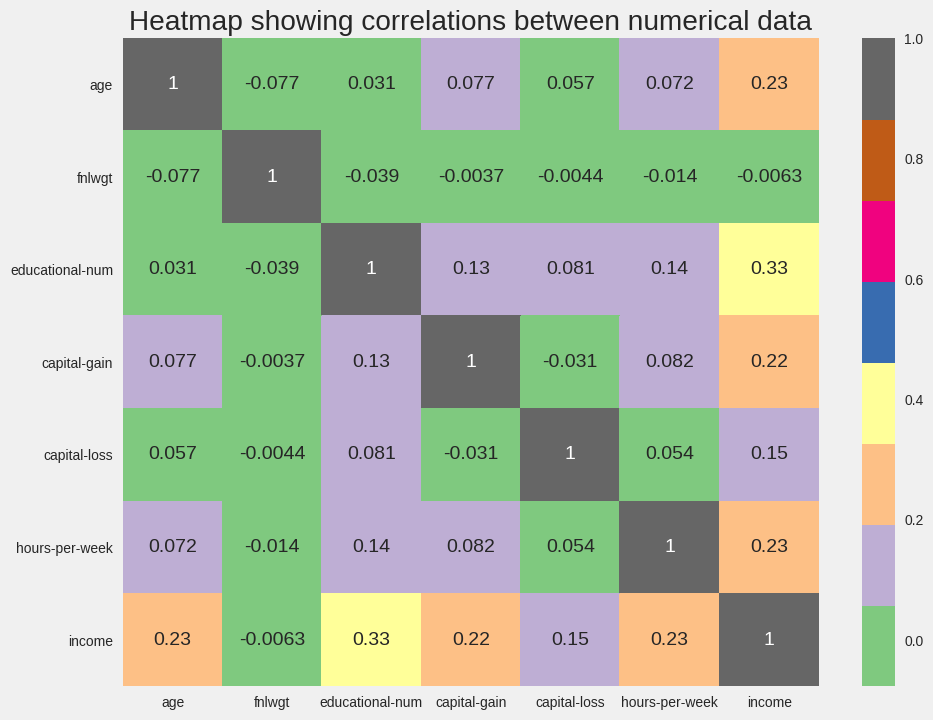

In [48]:
plt.figure(figsize=(10,8))  
sns.heatmap(data.corr(),cmap='Accent',annot=True)
#data.corr()
plt.title('Heatmap showing correlations between numerical data')

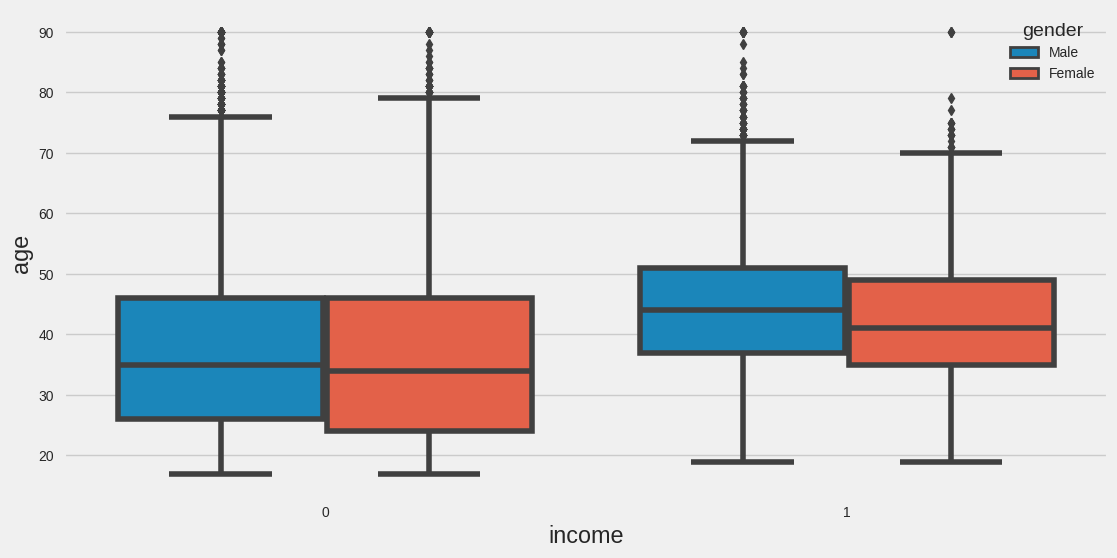

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income", y="age", data=data, hue='gender')
#data[data['income']==0]['age'].mean()

**The mean age of people earning more than 50k per annum is around 44 whereas the mean age of of those earning less than 50k per annum is 36.**

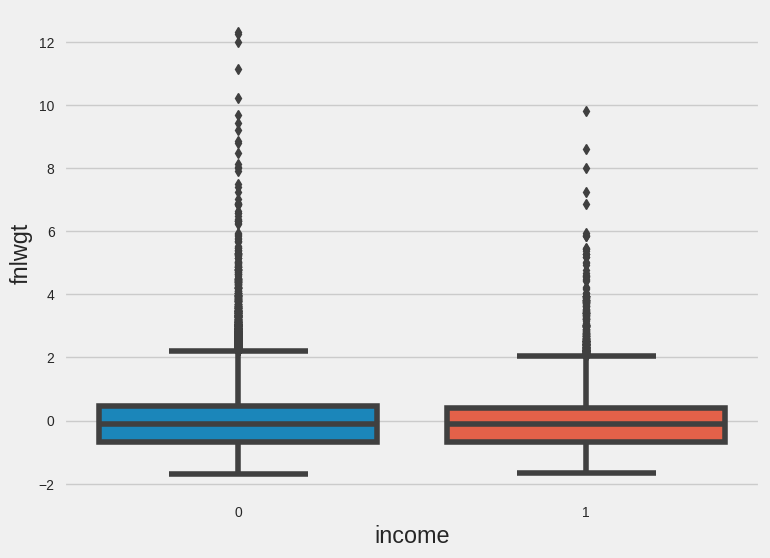

In [50]:
norm_fnl = (data["fnlwgt"] - data['fnlwgt'].mean())/data['fnlwgt'].std()
plt.figure(figsize=(8,6))
sns.boxplot(x="income", y=norm_fnl, data=data)

**As evident from the plot above, there are many outliers in the fnlwgt column and this feature is uncorrelated with income, our target variable. The correlation coefficient (which one can read from the heatmap) is -0.0095. The number of outliers, i.e. the number of records which are more than 2 s.d's away from the mean, is 1866.**

In [51]:
data[norm_fnl>2].shape

(1866, 15)

[Text(0, 0.5, 'Fraction of people with income > $50k')]

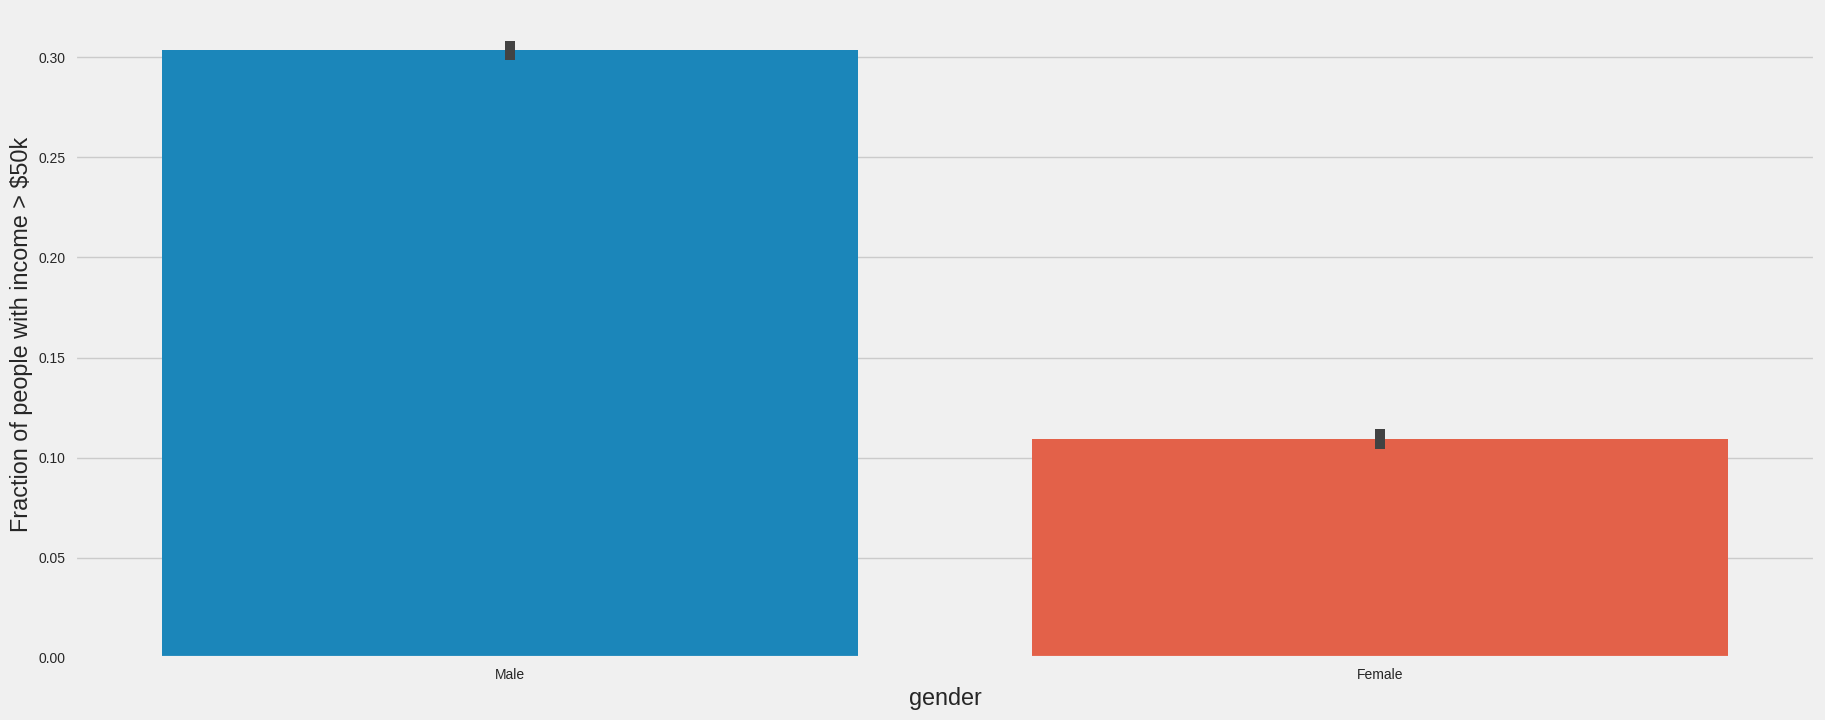

In [52]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='gender',y='income',data=data)
ax.set(ylabel='Fraction of people with income > $50k')

**The fraction of rich among men is significantly higher than that among women.**

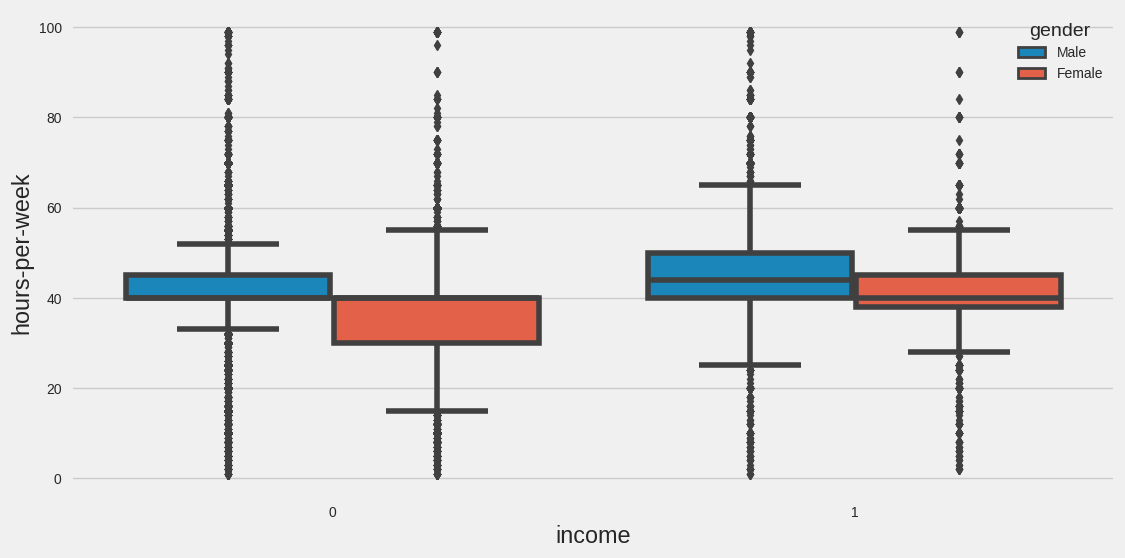

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=data)

[Text(0, 0.5, 'mean hours per week')]

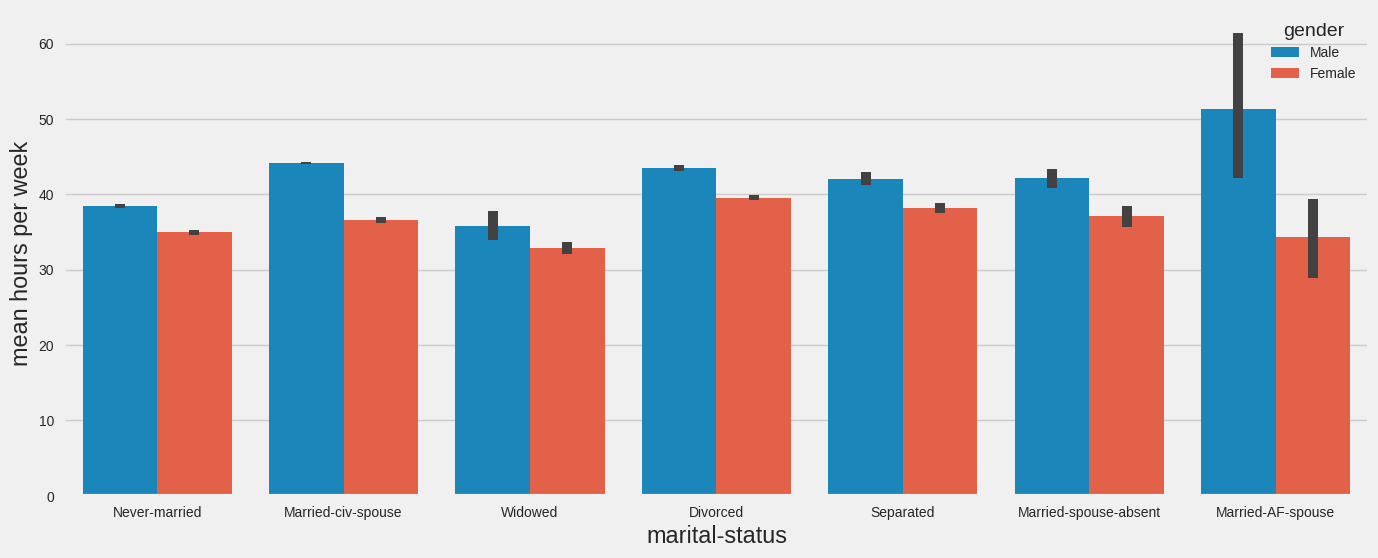

In [54]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='marital-status',y='hours-per-week',data=data,hue='gender')
ax.set(ylabel='mean hours per week')

[Text(0, 0.5, 'Mean education')]

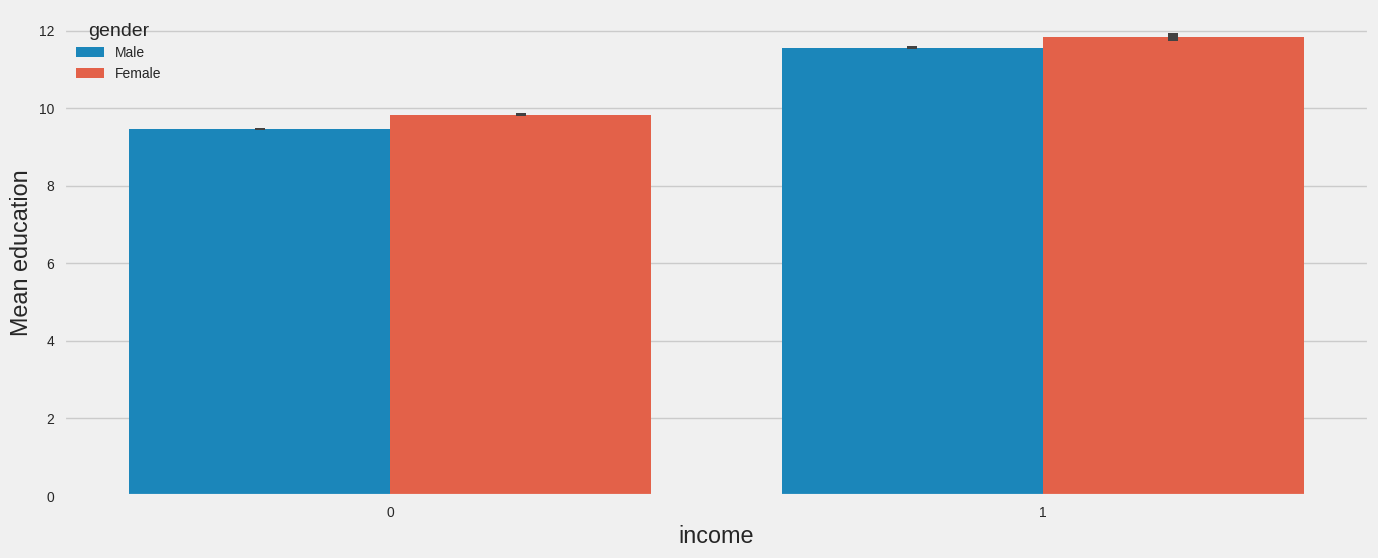

In [55]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='income', y='educational-num',hue='gender', data=data)
ax.set(ylabel='Mean education')

**The education.num is label encoded such that a higher number corresponds to a higher level of education. As on would naïvely expect, people who earn more (>50k per annum) are also highly educated. The mean education level for income=1 class is between 11  and 12  whereas that for the income=0 class is between 9 (HS-grad) and 10 (Some-college).**

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


[Text(0, 0.5, 'Fraction of people with income > $50k')]

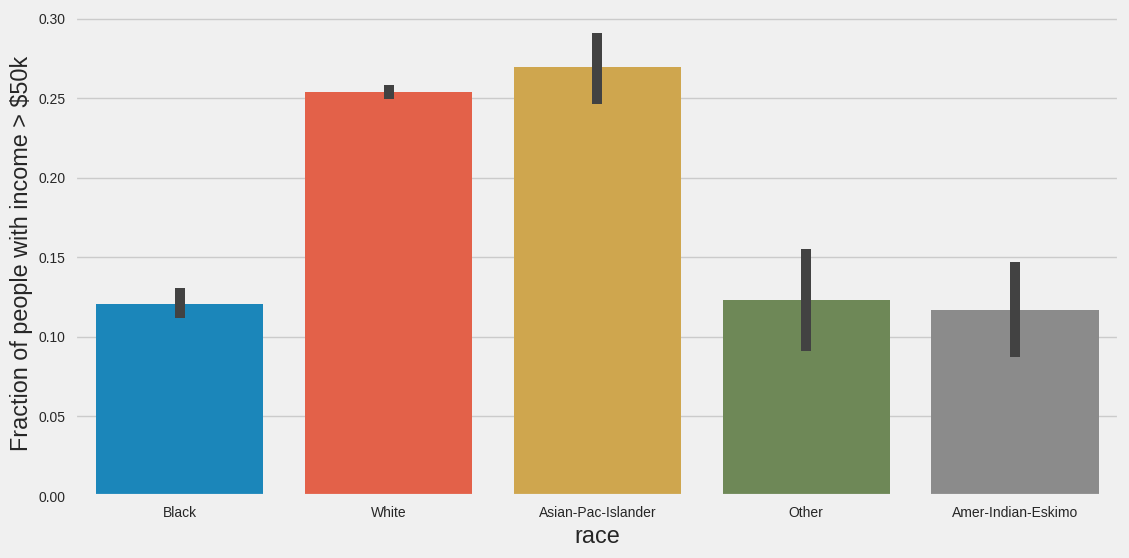

In [56]:
print(data['race'].value_counts())
plt.figure(figsize=(12,6))
ax=sns.barplot(x='race',y='income',data=data)
ax.set(ylabel='Fraction of people with income > $50k')

<Figure size 1200x600 with 0 Axes>

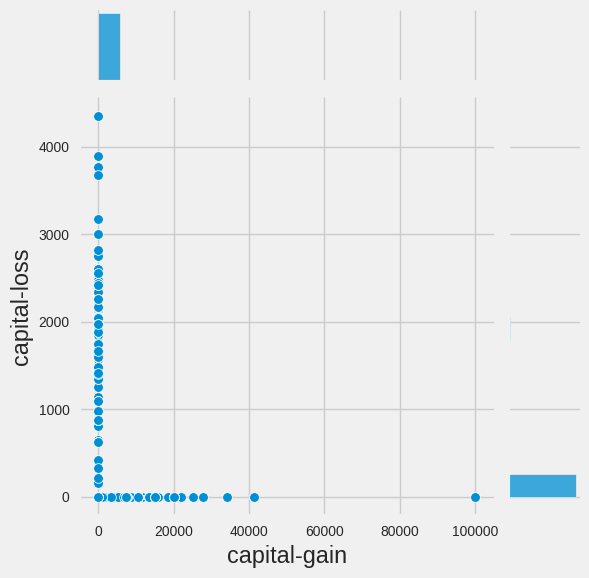

In [57]:
plt.figure(figsize=(12,6))
sns.jointplot(x=data['capital-gain'], y=data['capital-loss'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


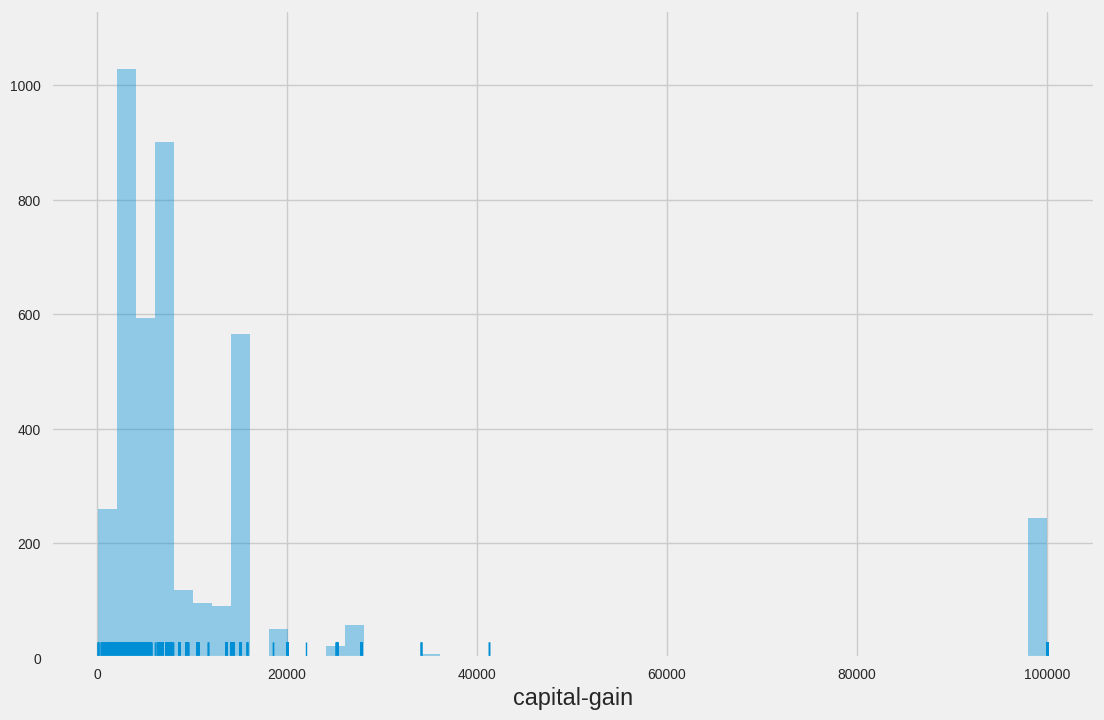

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(data[(data['capital-gain']!=0)]['capital-gain'],kde=False, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


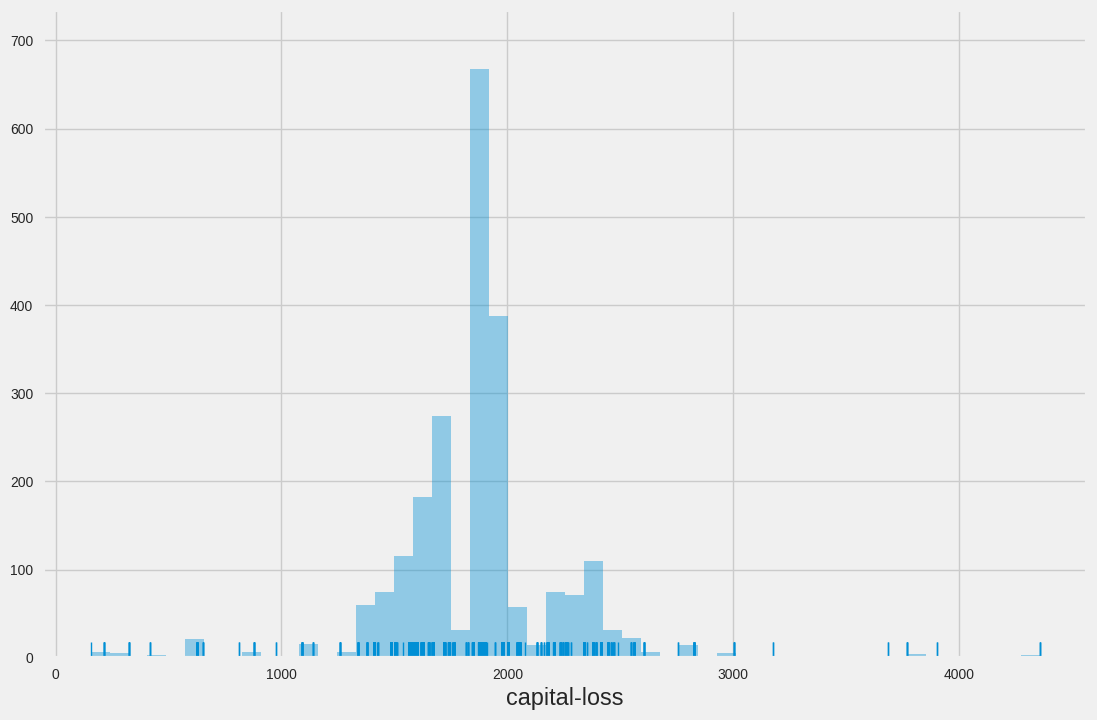

In [59]:
plt.figure(figsize=(12,8))
sns.distplot(data[(data['capital-loss']!=0)]['capital-loss'], kde=False,rug=True)

[Text(0, 0.5, 'Fraction of people with income > $50k')]

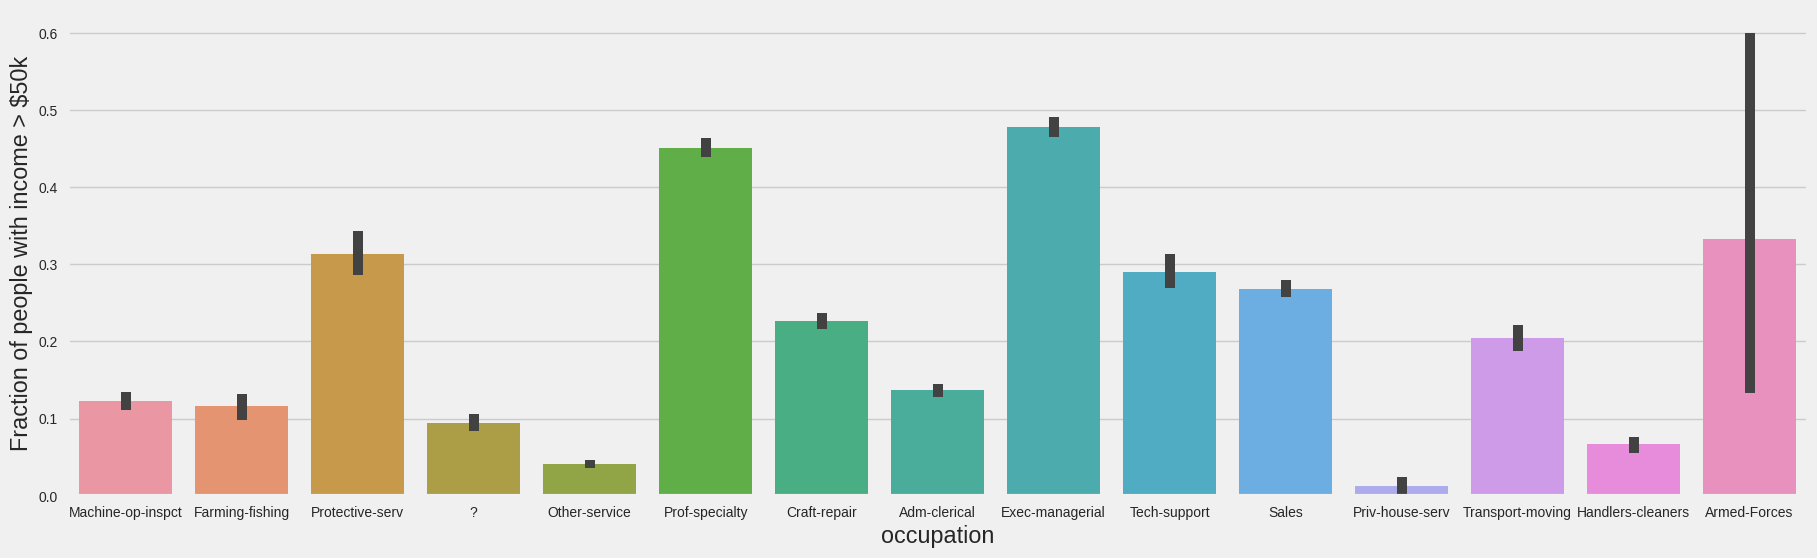

In [60]:
plt.figure(figsize=(20,6))
ax=sns.barplot(x='occupation', y='income', data=data)
ax.set(ylabel='Fraction of people with income > $50k')

In [61]:
print(data['native-country'].value_counts())
not_from_US = np.sum(data['native-country']!='United-States')
print(not_from_US, 'people are not from the United States')

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

**Convert the native-country feature to binary since there is a huge imbalance in this feature**

In [62]:
data['native-country'] = (data['native-country']=='United-States')*1

In [63]:
data['native-country'].value_counts()

1    43832
0     5010
Name: native-country, dtype: int64

**Now time to work clean data set**

In [64]:
data.select_dtypes(exclude=[np.number]).head()

,workclass,education,marital-status,occupation,relationship,race,gender
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male
4,?,Some-college,Never-married,?,Own-child,White,Female


In [65]:
#Replace all '?'s with NaNs.
data = data.applymap(lambda x: np.nan if x=='?' else x)

In [66]:
data.isnull().sum(axis=0) # How many issing values are there in the dataset?

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [67]:
data.shape[0] - data.dropna(axis=0).shape[0]   # how many rows will be removed if I remove all the NaN's?

2809

In [68]:
data = data.dropna(axis=0) ## Drop all the NaNs

In [69]:
data.education.value_counts()  # I will label-encode the education column since it is an ordinal categorical variable

HS-grad         14972
Some-college    10036
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1631
Assoc-acdm       1529
10th             1239
7th-8th           844
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: education, dtype: int64

**One-hot encoding of the categorical columns**

In [70]:
data = pd.get_dummies(data,columns=['workclass','gender', 'marital-status',
                                    'race','relationship','occupation'],
               prefix=['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)
### native country is ignored because that feature will be dropped later

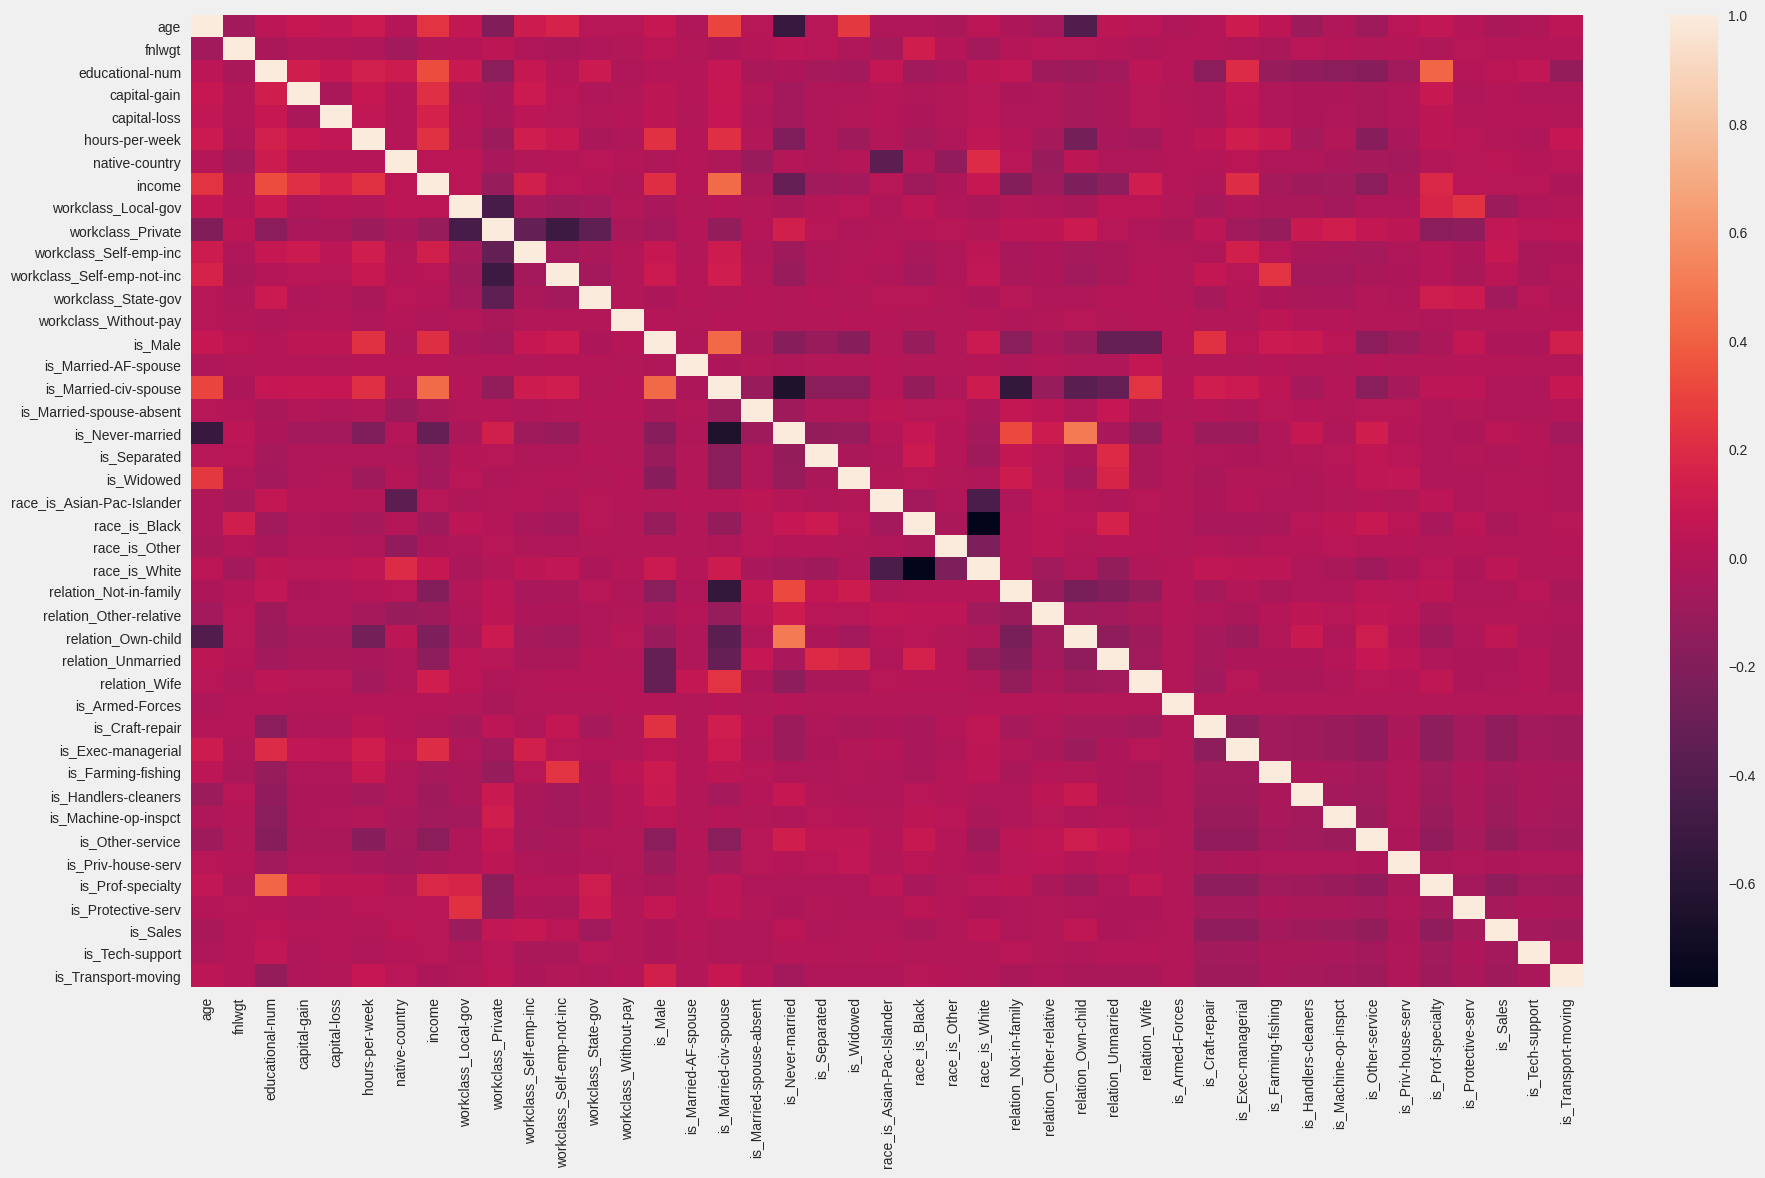

In [71]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr())

In [72]:
data.select_dtypes(exclude=[np.number]).shape

(46033, 1)

In [73]:
data.groupby('income').mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,is_Male,is_Married-AF-spouse,is_Married-civ-spouse,is_Married-spouse-absent,is_Never-married,is_Separated,is_Widowed,race_is_Asian-Pac-Islander,race_is_Black,race_is_Other,race_is_White,relation_Not-in-family,relation_Other-relative,relation_Own-child,relation_Unmarried,relation_Wife,is_Armed-Forces,is_Craft-repair,is_Exec-managerial,is_Farming-fishing,is_Handlers-cleaners,is_Machine-op-inspct,is_Other-service,is_Priv-house-serv,is_Prof-specialty,is_Protective-serv,is_Sales,is_Tech-support,is_Transport-moving
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,36.756320,190220.927451,9.639479,147.992604,53.942128,39.383549,0.891162,0.063824,0.766201,0.021872,0.080466,0.041923,0.000549,0.617896,0.000520,0.338187,0.015197,0.408916,0.038543,0.033920,0.029470,0.109907,0.009477,0.840109,0.308081,0.038976,0.190633,0.131779,0.031897,0.000289,0.136633,0.091821,0.038051,0.055878,0.076565,0.136344,0.006905,0.097888,0.019502,0.116408,0.029644,0.054145
1,44.011819,188545.149536,11.612064,4042.540974,194.141744,45.690247,0.914726,0.081159,0.646734,0.082122,0.094292,0.046402,0.000175,0.851690,0.001226,0.853266,0.004990,0.063211,0.008667,0.010681,0.035283,0.048328,0.004115,0.907634,0.109701,0.004465,0.009455,0.026790,0.090615,0.000438,0.121082,0.254596,0.015146,0.012082,0.032569,0.017860,0.000263,0.243740,0.026966,0.129137,0.036771,0.042112


In [74]:
data.shape

(46033, 44)

In [75]:
y = data.income
X = data.drop(['income', 'education', 'native-country', 'fnlwgt'],axis=1)

>**income is dropped from X because it is the target variable.**

> **Education is dropped because it is already label-encoded in education.num. One can notice the high correlation between education and education.num in the heatmap.** 

>**native country is dropped because it showed very little feature importance in random forest classifer**.

>**fnlwgt is dropped because it has no correlation with income.**



# Modelling
**This section explores different classification algorithms to maximise the accuracy for predicting income of a person (> 50k/yr or < 50k/yr).**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier as xgb
from sklearn import metrics

#**Baseline model**


> **In the baseline model, we predict the minority class for all our train and test (or validation) examples. The resulting accuracy will serve as a benchmark for the ML models. In other words, the sophisticated ML models should have an accuracy which should at least better the baseline one.**






In [79]:
baseline_train = np.zeros(y_train.shape[0])
baseline_test = np.zeros(y_test.shape[0])
print('Accuracy on train data: %f%%' % (metrics.accuracy_score(y_train, baseline_train)))
print('Accuracy on test data: %f%%' %  (metrics.accuracy_score(y_test, baseline_test)))

Accuracy on train data: 0.752506%
Accuracy on test data: 0.750398%


# **Random Forest classifier**

In [80]:
rfmodel = RandomForestClassifier(n_estimators=300,oob_score=True,min_samples_split=5,max_depth=10,random_state=10)
rfmodel.fit(X_train,y_train)
print(rfmodel)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)


In [81]:
def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('confusion matrix of training data')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('confusion matrix of test data')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('classification report of test data')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
    print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, clf.predict(X_test))*100))
    print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, clf.predict(X_train))*100))
    print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, clf.predict(X_test))))

In [82]:
show_classifier_metrics(rfmodel,y_train)
print('RandomForestClassifier score = %f'% rfmodel.oob_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)
confusion matrix of training data
[[23202  1046]
 [ 3371  4604]]
confusion matrix of test data
[[9885  478]
 [1489 1958]]
classification report of test data
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10363
           1       0.80      0.57      0.67      3447

    accuracy                           0.86     13810
   macro avg       0.84      0.76      0.79     13810
weighted avg       0.85      

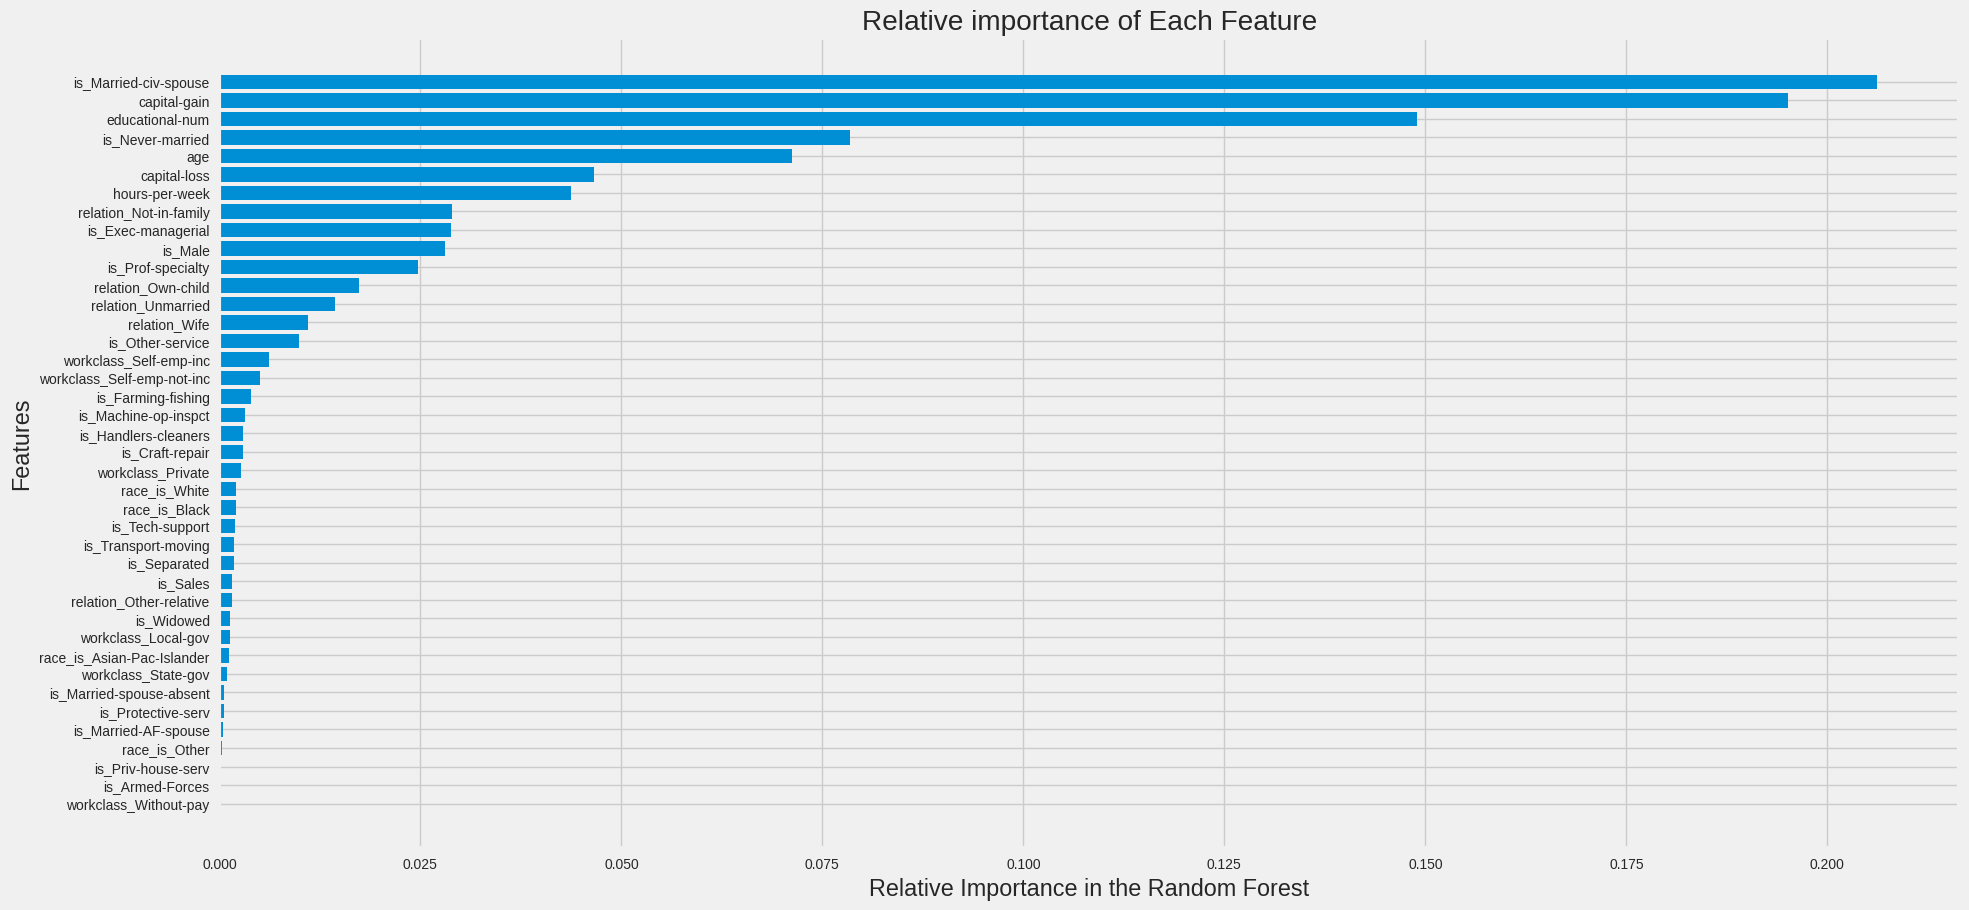

In [83]:
importance_list = rfmodel.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(20,10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

# **Random forest: Grid Search and cross-validation**


In [84]:
from sklearn.model_selection import cross_val_score, GridSearchCV

def grid_search(clf, parameters, X, y, n_jobs= -1, n_folds=4, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func,verbose =2)
    else:
        print('Doing grid search')
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose =1)
    gs.fit(X, y)
    print("mean test score (weighted by split size) of CV rounds: ",gs.cv_results_['mean_test_score'] )
    print ("Best parameter set", gs.best_params_, "Corresponding mean CV score",gs.best_score_)
    best = gs.best_estimator_
    return best

In [85]:
rfmodel2 = RandomForestClassifier(min_samples_split=5,oob_score=True, n_jobs=-1,random_state=10)
parameters = {'n_estimators': [100,200,300], 'max_depth': [10,13,15,20]}
rfmodelCV = grid_search(rfmodel2, parameters,X_train,y_train)

Doing grid search
Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.7min finished


mean test score (weighted by split size) of CV rounds:  [0.85628277 0.85622071 0.85681037 0.85923099 0.8590758  0.85941718
 0.85988268 0.86003782 0.86006887 0.85916886 0.85907578 0.85895168]
Best parameter set {'max_depth': 15, 'n_estimators': 300} Corresponding mean CV score 0.8600688684793041


In [86]:
rfmodelCV.fit(X_train,y_train)
show_classifier_metrics(rfmodelCV,y_train)
print('RandomForestClassifier score = %f'% rfmodelCV.oob_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)
confusion matrix of training data
[[23236  1012]
 [ 2839  5136]]
confusion matrix of test data
[[9819  544]
 [1389 2058]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10363
           1       0.79      0.60      0.68      3447

    accuracy                           0.86     13810
   macro avg       0.83      0.77      0.80     13810
weighted avg       0.85      0.

# **XGBoost**

In [87]:
from xgboost.sklearn import XGBClassifier

param = {}
param['learning_rate'] = 0.1
param['verbosity'] = 1
param['colsample_bylevel'] = 0.9
param['colsample_bytree'] = 0.9
param['subsample'] = 0.9
param['reg_lambda']= 1.5
param['max_depth'] = 5
param['n_estimators'] = 400
param['seed']=10
xgb= XGBClassifier(**param)
xgb.fit(X_train, y_train, eval_metric=['error'], eval_set=[(X_train, y_train),(X_test, y_test)],early_stopping_rounds=40)

[0]	validation_0-error:0.153555	validation_1-error:0.155539
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 40 rounds.
[1]	validation_0-error:0.150576	validation_1-error:0.15076
[2]	validation_0-error:0.149365	validation_1-error:0.15134
[3]	validation_0-error:0.150265	validation_1-error:0.150905
[4]	validation_0-error:0.151196	validation_1-error:0.151122
[5]	validation_0-error:0.1507	validation_1-error:0.15105
[6]	validation_0-error:0.148496	validation_1-error:0.149747
[7]	validation_0-error:0.148	validation_1-error:0.148298
[8]	validation_0-error:0.147472	validation_1-error:0.148081
[9]	validation_0-error:0.148093	validation_1-error:0.148516
[10]	validation_0-error:0.14741	validation_1-error:0.147719
[11]	validation_0-error:0.147472	validation_1-error:0.147429
[12]	validation_0-error:0.144803	validation_1-error:0.144895
[13]	validation_0-error:0.144059	validation_1-error:0.144388
[14]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.9, verbosity=1)

In [88]:
show_classifier_metrics(xgb,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.9, verbosity=1)
confusion matrix of training data
[[22922  1326]
 [ 2474  5501]]
confusion matrix of test data
[[9735  628]
 [1143 2304]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10363
           1       0.79      0.67      0.72      3447

    accuracy                           0.87     13810
   macro avg       0.84      0.80      0.82     13810
weighted avg       0.87      0.87      0.87     13810

Accuracy on test data: 87.175959%
Accura

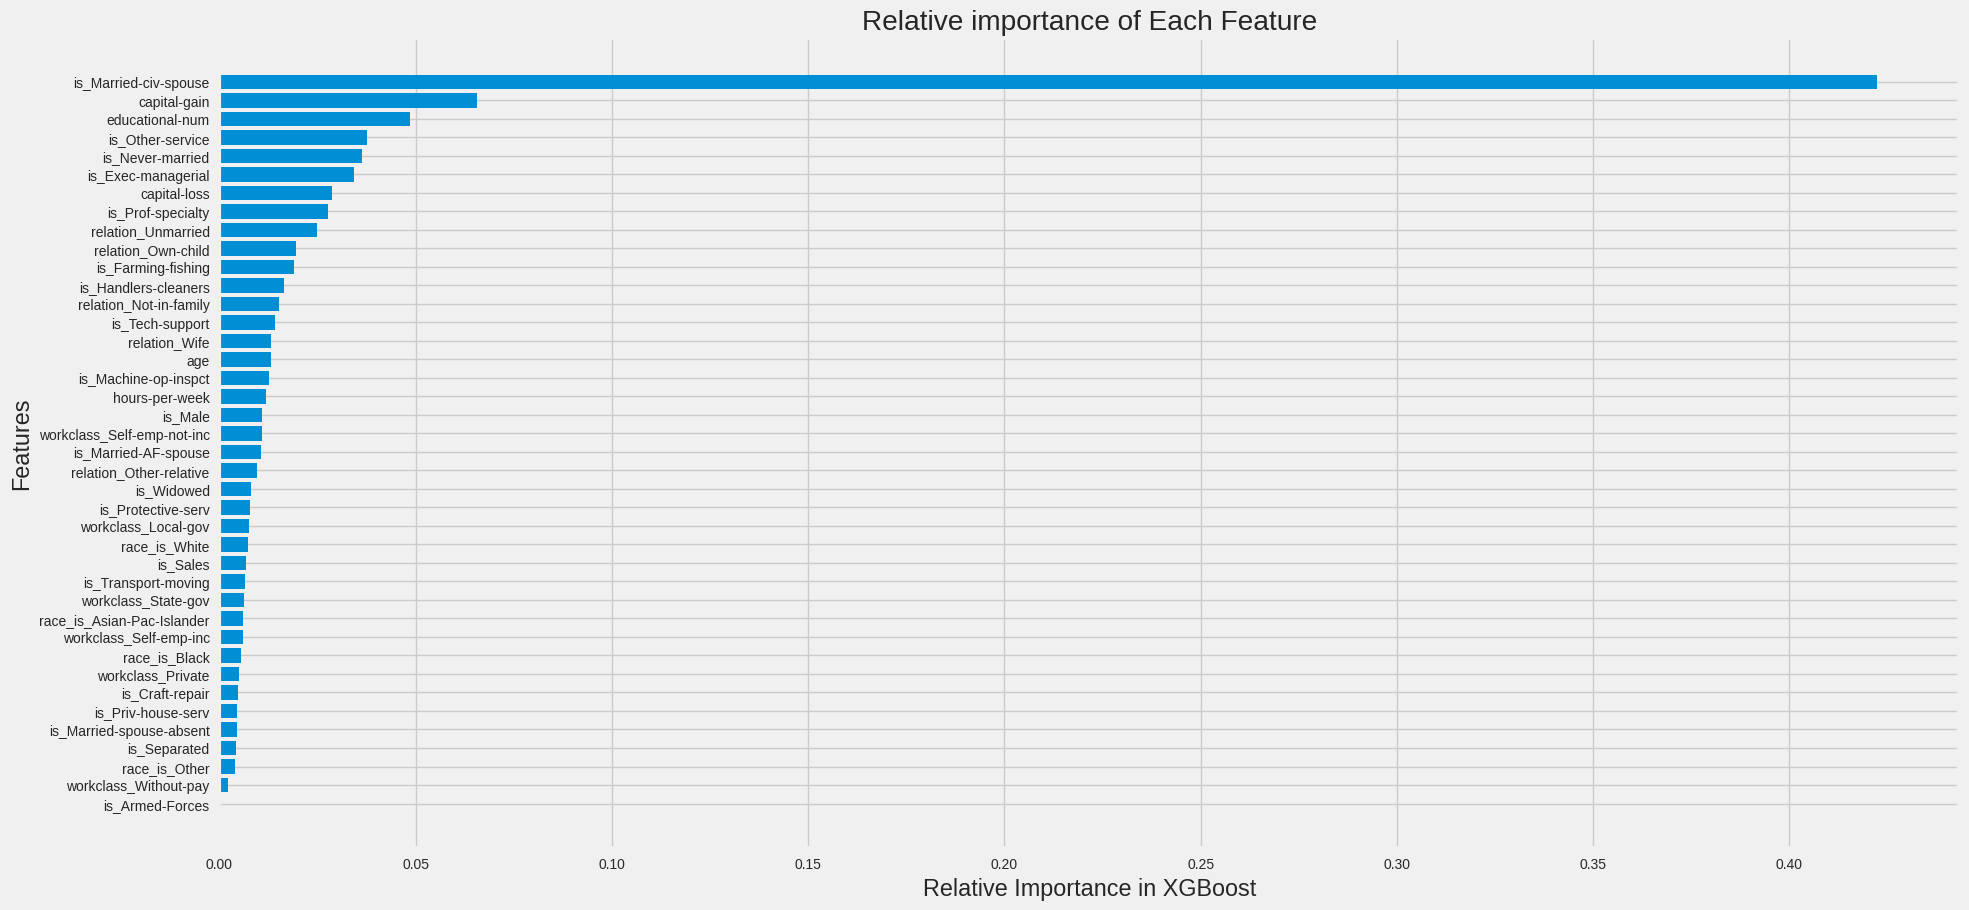

In [89]:
importance_list = xgb.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(20,10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in XGBoost')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

# **Grid search with cross validation: XGBoost model**


In [90]:
xgbmodel2 = XGBClassifier(seed=42)
param = {
'learning_rate': [0.1],#[0.1,0.2],
#'verbosity': [1],
'colsample_bylevel': [0.9],
'colsample_bytree': [0.9],
'subsample' : [0.9],
'n_estimators': [300],
'reg_lambda': [1.5,2,2.5],
'max_depth': [3,5,7],
 'seed': [10]   
}
xgbCV = grid_search(xgbmodel2, param,X_train,y_train)

Doing grid search
Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  5.0min finished


mean test score (weighted by split size) of CV rounds:  [0.86832378 0.86795134 0.86804445 0.86736172 0.86819963 0.86807549
 0.8650032  0.86512736 0.8662445 ]
Best parameter set {'colsample_bylevel': 0.9, 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_lambda': 1.5, 'seed': 10, 'subsample': 0.9} Corresponding mean CV score 0.8683237780909179


In [91]:
xgbCV.fit(X_train, y_train, eval_metric=['error'], eval_set=[(X_train, y_train),(X_test, y_test)],early_stopping_rounds=40)

[0]	validation_0-error:0.160506	validation_1-error:0.159522
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 40 rounds.
[1]	validation_0-error:0.160289	validation_1-error:0.159667
[2]	validation_0-error:0.160506	validation_1-error:0.159522
[3]	validation_0-error:0.160506	validation_1-error:0.159522
[4]	validation_0-error:0.160506	validation_1-error:0.159522
[5]	validation_0-error:0.160506	validation_1-error:0.159522
[6]	validation_0-error:0.160413	validation_1-error:0.15945
[7]	validation_0-error:0.160413	validation_1-error:0.15945
[8]	validation_0-error:0.1588	validation_1-error:0.158726
[9]	validation_0-error:0.158862	validation_1-error:0.158508
[10]	validation_0-error:0.159172	validation_1-error:0.158001
[11]	validation_0-error:0.156162	validation_1-error:0.156046
[12]	validation_0-error:0.156969	validation_1-error:0.156553
[13]	validation_0-error:0.156069	validation_1-error:0.155902

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.9, verbosity=1)

In [92]:
show_classifier_metrics(xgbCV,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.9, verbosity=1)
confusion matrix of training data
[[22891  1357]
 [ 2789  5186]]
confusion matrix of test data
[[9774  589]
 [1223 2224]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10363
           1       0.79      0.65      0.71      3447

    accuracy                           0.87     13810
   macro avg       0.84      0.79      0.81     13810
weighted avg       0.86      0.87      0.86     13810

Accuracy on test data: 86.879073%
Accura

# **Logistic regression**

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
param = {
'C': [3,5,10], 
'verbose': [1],
    'max_iter': [100,200,500,700]
}   
logreg = LogisticRegression(random_state=10)
logreg_grid = grid_search(logreg, param, X_train,y_train, n_folds=3)

Doing grid search
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   42.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


mean test score (weighted by split size) of CV rounds:  [0.82022158 0.83766254 0.84455203 0.84709679 0.82298358 0.84123142
 0.84588648 0.84557614 0.81953884 0.84160382 0.84390032 0.84628992]
Best parameter set {'C': 3, 'max_iter': 700, 'verbose': 1} Corresponding mean CV score 0.8470967942153121


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


In [95]:
logreg_grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [96]:
show_classifier_metrics(logreg_grid)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)
confusion matrix of training data
[[22433  1815]
 [ 3082  4893]]
confusion matrix of test data
[[9603  760]
 [1352 2095]]
classification report of test data
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10363
           1       0.73      0.61      0.66      3447

    accuracy                           0.85     13810
   macro avg       0.81      0.77      0.78     13810
weighted avg       0.84      0.85      0.84     13810

Accuracy on test data: 84.706734%
Accuracy on training data: 84.802781%
Area under the ROC curve : 0.767219


# **Naive Bayes**

In [97]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
NBmodel.predict(X_test)

array([1, 0, 1, ..., 0, 0, 1])

In [99]:
show_classifier_metrics(NBmodel,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix of training data
[[20777  3471]
 [ 2198  5777]]
confusion matrix of test data
[[8827 1536]
 [ 949 2498]]
classification report of test data
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     10363
           1       0.62      0.72      0.67      3447

    accuracy                           0.82     13810
   macro avg       0.76      0.79      0.77     13810
weighted avg       0.83      0.82      0.82     13810

Accuracy on test data: 82.005793%
Accuracy on training data: 82.406976%
Area under the ROC curve : 0.788234


# **Stacked model**

In [100]:
def create_stacked_dataset(clfs,modelnames, X_train=X_train,X_test=X_test):
    X_train_stack, X_test_stack = X_train, X_test
    for clf,modelname in zip(clfs,modelnames):
        temptrain = pd.DataFrame(clf.predict(X_train),index = X_train.index,columns=[modelname+'_prediction'])
        temptest  = pd.DataFrame(clf.predict(X_test),index = X_test.index,columns=[modelname+'_prediction'])
        X_train_stack = pd.concat([X_train_stack, temptrain], axis=1)
        X_test_stack = pd.concat([X_test_stack, temptest], axis=1)
    return (X_train_stack,X_test_stack)

In [101]:
X_train_stack,X_test_stack = create_stacked_dataset([rfmodelCV,logreg_grid,xgbCV],modelnames=['rfmodel','logreg', 'xgb'])

In [102]:
X_train_stack.head(5)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,is_Male,is_Married-AF-spouse,is_Married-civ-spouse,is_Married-spouse-absent,is_Never-married,is_Separated,is_Widowed,race_is_Asian-Pac-Islander,race_is_Black,race_is_Other,race_is_White,relation_Not-in-family,relation_Other-relative,relation_Own-child,relation_Unmarried,relation_Wife,is_Armed-Forces,is_Craft-repair,is_Exec-managerial,is_Farming-fishing,is_Handlers-cleaners,is_Machine-op-inspct,is_Other-service,is_Priv-house-serv,is_Prof-specialty,is_Protective-serv,is_Sales,is_Tech-support,is_Transport-moving,rfmodel_prediction,logreg_prediction,xgb_prediction
27836,29,13,0,0,50,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
39794,23,11,0,0,36,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10458,19,9,0,0,35,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45964,46,9,0,0,80,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4280,33,10,0,0,48,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [103]:
param = {}
param['learning_rate'] = 0.1
param['verbosity'] = 1
param['colsample_bylevel'] = 0.9
param['colsample_bytree'] = 0.9
param['subsample'] = 0.9
param['reg_lambda']= 1.5
param['max_depth'] = 5#10
param['n_estimators'] = 400
param['seed']=10
xgbstack= XGBClassifier(**param)
xgbstack.fit(X_train_stack, y_train, eval_metric=['error'], eval_set=[(X_train_stack, y_train),(X_test_stack, y_test)],early_stopping_rounds=30)

[0]	validation_0-error:0.118207	validation_1-error:0.136133
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.118239	validation_1-error:0.136785
[2]	validation_0-error:0.118114	validation_1-error:0.135988
[3]	validation_0-error:0.118797	validation_1-error:0.133599
[4]	validation_0-error:0.118332	validation_1-error:0.134902
[5]	validation_0-error:0.118301	validation_1-error:0.135988
[6]	validation_0-error:0.117773	validation_1-error:0.136857
[7]	validation_0-error:0.117773	validation_1-error:0.13693
[8]	validation_0-error:0.117897	validation_1-error:0.137364
[9]	validation_0-error:0.117866	validation_1-error:0.137437
[10]	validation_0-error:0.118083	validation_1-error:0.138088
[11]	validation_0-error:0.118207	validation_1-error:0.138378
[12]	validation_0-error:0.118456	validation_1-error:0.13874
[13]	validation_0-error:0.117711	validation_1-error:0.1372

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.9, verbosity=1)

In [104]:
print(metrics.classification_report(y_test, xgbstack.predict(X_test_stack)))
print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, xgbstack.predict(X_test_stack))*100))
print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, xgbstack.predict(X_train_stack))*100))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10363
           1       0.78      0.65      0.71      3447

    accuracy                           0.87     13810
   macro avg       0.83      0.79      0.81     13810
weighted avg       0.86      0.87      0.86     13810

Accuracy on test data: 86.640116%
Accuracy on training data: 88.120287%


# **Stacked model Grid Search**

In [105]:
xgbstackCV = XGBClassifier(seed=10)
param_grid = {}
param_grid['learning_rate'] = [0.1]
param_grid['colsample_bylevel'] = [0.9]
param_grid['colsample_bytree'] = [0.9]
param_grid['subsample'] = [0.9]
param_grid['n_estimators'] = [300]
param_grid['reg_lambda']= [1.5]
param_grid['seed'] =[10]
param_grid['max_depth'] = [3,5,8,10]
xgbstackCV_grid = grid_search(xgbstackCV, param_grid,X_train_stack,y_train)

Doing grid search
Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  3.1min finished


mean test score (weighted by split size) of CV rounds:  [0.88306472 0.88123373 0.87583388 0.87238914]
Best parameter set {'colsample_bylevel': 0.9, 'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_lambda': 1.5, 'seed': 10, 'subsample': 0.9} Corresponding mean CV score 0.8830647178317883


In [106]:
xgbstackCV_grid.fit(X_train_stack, y_train, eval_metric=['error'], eval_set=[(X_train_stack, y_train),(X_test_stack, y_test)],early_stopping_rounds=30)

[0]	validation_0-error:0.119511	validation_1-error:0.139971
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.119511	validation_1-error:0.139971
[2]	validation_0-error:0.118083	validation_1-error:0.137002
[3]	validation_0-error:0.121063	validation_1-error:0.134902
[4]	validation_0-error:0.118083	validation_1-error:0.137002
[5]	validation_0-error:0.118083	validation_1-error:0.137075
[6]	validation_0-error:0.118363	validation_1-error:0.137799
[7]	validation_0-error:0.119511	validation_1-error:0.139971
[8]	validation_0-error:0.119511	validation_1-error:0.139971
[9]	validation_0-error:0.119511	validation_1-error:0.139971
[10]	validation_0-error:0.119511	validation_1-error:0.139971
[11]	validation_0-error:0.119511	validation_1-error:0.139971
[12]	validation_0-error:0.119511	validation_1-error:0.139971
[13]	validation_0-error:0.119511	validation_1-error:0.13

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.9, verbosity=1)

In [107]:
print(metrics.classification_report(y_test, xgbstack.predict(X_test_stack)))
print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, xgbstack.predict(X_test_stack))*100))
print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, xgbstack.predict(X_train_stack))*100))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10363
           1       0.78      0.65      0.71      3447

    accuracy                           0.87     13810
   macro avg       0.83      0.79      0.81     13810
weighted avg       0.86      0.87      0.86     13810

Accuracy on test data: 86.640116%
Accuracy on training data: 88.120287%


In [108]:
pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [109]:
from catboost import CatBoostClassifier

catb = CatBoostClassifier(learning_rate=0.3,iterations=400,verbose=0,random_seed=10,eval_metric='Accuracy',rsm=0.9)
catb.fit(X_train,y_train,eval_set=[(X_train,y_train), (X_test,y_test)],early_stopping_rounds=40)

In [110]:
show_classifier_metrics(catb)

confusion matrix of training data
[[22950  1298]
 [ 2598  5377]]
confusion matrix of test data
[[9763  600]
 [1186 2261]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10363
           1       0.79      0.66      0.72      3447

    accuracy                           0.87     13810
   macro avg       0.84      0.80      0.82     13810
weighted avg       0.87      0.87      0.87     13810

Accuracy on test data: 87.067343%
Accuracy on training data: 87.909257%
Area under the ROC curve : 0.799017


# **Catboost grid search**

In [111]:
catbCV = CatBoostClassifier(verbose=0,random_seed=10,eval_metric='Accuracy')
param_grid = {}
param_grid['learning_rate'] = [0.1]#, 0.3]
param_grid['rsm'] = [0.9]
#param_grid['subsample'] = [0.9]
param_grid['iterations'] = [200,300]
param_grid['reg_lambda']= [3] #2
param_grid['depth'] = [8,10]#5
catbCV_grid = grid_search(catbCV, param_grid,X_train,y_train)

Doing grid search
Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.5min finished


mean test score (weighted by split size) of CV rounds:  [0.8677032  0.86717554 0.86475493 0.86382391]
Best parameter set {'depth': 8, 'iterations': 200, 'learning_rate': 0.1, 'reg_lambda': 3, 'rsm': 0.9} Corresponding mean CV score 0.8677031958783857


In [112]:
catbCV_grid.fit(X_train,y_train,eval_set=[(X_train,y_train), (X_test,y_test)],early_stopping_rounds=30)

In [113]:
show_classifier_metrics(catbCV_grid)

confusion matrix of training data
[[23047  1201]
 [ 2505  5470]]
confusion matrix of test data
[[9764  599]
 [1194 2253]]
classification report of test data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10363
           1       0.79      0.65      0.72      3447

    accuracy                           0.87     13810
   macro avg       0.84      0.80      0.82     13810
weighted avg       0.87      0.87      0.87     13810

Accuracy on test data: 87.016655%
Accuracy on training data: 88.498898%
Area under the ROC curve : 0.797905


In [114]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [115]:
np.sum(y_train)/y_train.shape[0]

0.24749402600626882

In [116]:
ros = RandomOverSampler(random_state=1,sampling_strategy=0.8)

In [117]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
catb_ros = CatBoostClassifier(learning_rate=0.1,iterations=400,reg_lambda=2,verbose=0,random_seed=10,eval_metric='Accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [118]:
catb_ros.fit(X_resampled,y_resampled,eval_set=[(X_resampled,y_resampled), (X_test,y_test)],early_stopping_rounds=40)

In [119]:
print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, catb_ros.predict(X_test))*100))
print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_resampled, catb_ros.predict(X_resampled))*100))
print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, catb_ros.predict(X_test))))

Accuracy on test data: 84.786387%
Accuracy on training data: 86.612748%
Area under the ROC curve : 0.838804


# **SMOTE**

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smt = SMOTE(random_state=10,sampling_strategy=0.7)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [122]:
y_train.value_counts()

0    24248
1     7975
Name: income, dtype: int64

In [123]:
np.bincount(y_train_smt)

array([24248, 16973])

In [124]:
catb_smote = CatBoostClassifier(learning_rate=0.1,iterations=400,reg_lambda=2,verbose=0,random_seed=10,eval_metric='Accuracy')
catb_smote.fit(X_train_smt,y_train_smt,eval_set=[(X_train_smt,y_train_smt), (X_test,y_test)],early_stopping_rounds=40)

In [125]:
print(metrics.classification_report(y_test, catb_smote.predict(X_test)))
print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, catb_smote.predict(X_test))*100))
print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train_smt, catb_smote.predict(X_train_smt))*100))
print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, catb_ros.predict(X_test))))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     10363
           1       0.70      0.75      0.72      3447

    accuracy                           0.86     13810
   macro avg       0.81      0.82      0.81     13810
weighted avg       0.86      0.86      0.86     13810

Accuracy on test data: 85.684287%
Accuracy on training data: 88.632008%
Area under the ROC curve : 0.838804


# **SMOTE with XGBoost**

In [126]:
param = {}
param['learning_rate'] = 0.1
param['verbosity'] = 1
param['colsample_bylevel'] = 0.9
param['colsample_bytree'] = 0.9
param['subsample'] = 0.9
param['reg_lambda']= 1.5
param['max_depth'] = 5
param['n_estimators'] = 400
param['seed']=10
xgb_smote= XGBClassifier(**param)
xgb_smote.fit(X_train_smt, y_train_smt, eval_metric=['error'], eval_set=[(X_train_smt, y_train_smt),(X_test.values, y_test.values)],early_stopping_rounds=30)

[0]	validation_0-error:0.197569	validation_1-error:0.206951
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.198224	validation_1-error:0.206951
[2]	validation_0-error:0.191068	validation_1-error:0.209631
[3]	validation_0-error:0.189879	validation_1-error:0.208617
[4]	validation_0-error:0.19017	validation_1-error:0.199566
[5]	validation_0-error:0.188084	validation_1-error:0.200072
[6]	validation_0-error:0.187768	validation_1-error:0.199928
[7]	validation_0-error:0.176269	validation_1-error:0.181463
[8]	validation_0-error:0.175711	validation_1-error:0.181897
[9]	validation_0-error:0.17707	validation_1-error:0.184287
[10]	validation_0-error:0.175153	validation_1-error:0.183635
[11]	validation_0-error:0.174086	validation_1-error:0.182042
[12]	validation_0-error:0.173116	validation_1-error:0.178277
[13]	validation_0-error:0.173383	validation_1-error:0.1799

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1.5, scale_pos_weight=1, seed=10,
              silent=None, subsample=0.9, verbosity=1)

In [127]:
print(metrics.classification_report(y_test, xgb_smote.predict(X_test.values)))
print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, xgb_smote.predict(X_test.values))*100))
print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train_smt, xgb_smote.predict(X_train_smt))*100))
print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, xgb_smote.predict(X_test.values))))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     10363
           1       0.70      0.75      0.73      3447

    accuracy                           0.86     13810
   macro avg       0.81      0.82      0.82     13810
weighted avg       0.86      0.86      0.86     13810

Accuracy on test data: 85.821868%
Accuracy on training data: 88.357876%
Area under the ROC curve : 0.823439


# **Save model**

In [133]:
import pickle
pickle.dump(xgb_smote, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

#prediction = model.predict(np.array([[20, 10, 3, 5, 40,20, 10, 3, 5, 40,20, 10, 3, 5, 40,20, 10, 3, 5, 40,20, 10, 3, 5, 40,20, 10, 3, 5, 40,20, 10, 3, 5, 40,20, 10, 3, 5, 40]]))

# **Conclusion:**


> **In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.**

> **A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.**

# **Thank-you**